In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

'''CFRS is Cluster First Route Second'''

'''n_clusters = the number of clusters that you want e.g n_clusters = 2
cartposition = the current location of the carts e.g cartposition = [6, 1]
pickup = pickup location e.g pickup = [5,1,7,5,4,3,4,5,1]
delivery = delivery location e.g delivery = [2,3,6,8,3,6,2,7,8]
volume = The lot of lots carried al through the whole cluster.
'''

def CFRSKMeans(n_clusters,cartposition,pickup,delivery,Volume):
   
    # Assigning different empty lists
    
    # Distances stores the distance in mm between any pickup and delivery picked.
    # The distance between consecutive machines is 10mm.
    
    Distances = []
    
    # DistCart is used to append the sum total of distance travelled from  cartposition to 
    # pickup to delivery and back to the cartposition.
    DistCart = []
    
    avgCartLoad = []
    
    #The number of requests
    Request = [req for req in range(1,len(pickup)+1)]

    # for loop to calculate the distance between any pickup and delivery.
    # The distance between consecutive machines is 10mm
    i = 0
    for i in range(len(cartposition)): 

        j=0
        while j < len(pickup):

            # Calculating the distance between the position of the cart and the pickup
            Distance1 =abs(np.array(pickup) - cartposition[i])*10

            # Distance between Pickup and delievery
            Distance2 = list(map(lambda x,y: abs(x-y)*10, pickup,delivery))

            # Calculating the distance between the position of the cart and the pickup
            Distance3 =abs(np.array(delivery) - cartposition[i])*10

            ''' suming the distance from the cart to the pickup, pickup to the delivery 
            and delivery back to the position of the cart.
            '''
            Distance = Distance1[j] + Distance2[j] + Distance3[j]
            
        
            # Appending the distances in Distance
            
            Distances.append(Distance)
            
            j+=1
        pass
        #print ( 'distance for cart', cartposition[i] ,'=',Distances)
       
        DistCart.append(Distances.copy())
        Distances[:]= []
    #print(DistCart)
    b = 0
    
    # Value appends the distances in distCart by puting all arrays of Distcart into one array
    # such that the value of same indexes are beside each other.
    
    value = []
    
    for c in range(len(pickup)):
        for a in DistCart:
            value.append(a[b])

        b+=1
    #print(value)
    
    # Value1 splites the array of value into smaller array of the lenght of the cluster.
    
    value1 = []
    
    for s in range(0,len(value),len(cartposition)): # (startvalue, stopvalue, stepvalue)
        value1.append(value[s:s + len(cartposition)])
        
    #print( value1)
    
    # using KMeans as our clustering tool.
    
    X = np.asarray(value1)
    kmeans = KMeans(n_clusters, random_state=0).fit(X)
    
    #print(kmeans.labels_)
    #kMeans.cluster_centers_
    

    # This for loop splits the pickup and delivery into the respective clusters
    
    # Appends the pickups splited into clusters
    Index1 = [] 
   
    # Appends the delieveries splited into clusters
    Index3 = []
    
    # Appends the volume splited into clusters
    Index5 = []
    
    # Appends the request splited into clusters
    Index7 = []
    
    for l in np.unique(kmeans.labels_):
        
        Index = [pickup[k] for k, x in enumerate(kmeans.labels_) if x == l]
        Index1.append(Index)
        Index2 = [delivery[k] for k, x in enumerate(kmeans.labels_) if x == l]
        Index3.append(Index2)
        Index4 = [Volume[k] for k, x in enumerate(kmeans.labels_) if x == l]
        Index5.append(Index4)
        Index6 = [Request[k] for k, x in enumerate(kmeans.labels_) if x == l]
        Index7.append(Index6)
        

    #print (Index1)
    #print (Index3)
    #print (Index5)
    #print (Index7)
    

    # This for loop assigns value to depot, pickup and delivery.
    
    for v in range(len(cartposition)):

        depot = cartposition[v]
        pickup = Index1[v]
        delivery = Index3[v]
        Volume = Index5[v]
        Request = Index7[v]
        #print (depot,pickup,delivery, volume)
            
        # Retains values before the iteration    
        pickup1 = pickup.copy()
        delivery1 = delivery.copy()


        # Calculating the distance between the depot and the pickup
        Distance1 =abs(np.array(pickup) - depot)*10

        #Minimum distance of Distance1
        minDistance1 =  min(Distance1)

        # Putting the index of the minDistance into a list(This index could be more than one).
        minDistanceIndex = [k for k, x in enumerate(Distance1) if x == minDistance1]

        # looping through minDistanceIndex
        for j in minDistanceIndex:

            # Re-assigning the minimum in Distance1 for each index in minDistanceIndex
            if(np.any(min(Distance1) == Distance1[j])):
                minDistance1 = Distance1[j] 

                # Making sure that the pickup and delivery are the original pickup and delivery inputed by the user.
                pickup = pickup1.copy()
                delivery = delivery1.copy()


                # Distance between Pickup and delievery
                Distance2 = list(map(lambda x,y: abs(x-y)*10, pickup,delivery))


                # Taking the minimum of the distance between the depot ,pickup and delivery
                Distances = [minDistance1,Distance2.pop(j)]

                '''Picking the index of the vector with the shortest distance 
                in pickup and delivery and putting them in an array that contains the depot already'''

                route = [depot, pickup.pop(j),delivery.pop(j)]

                # Looping through pickup till the list becomes empty 
                p=0
                while p < len(pickup1)-1:

                    # checking for the nearest pickup location close to the delivery location of the previous pickup
                    Distance3 = list(map(lambda i:abs(i-route[-1])*10,pickup))

                    # Minimum distance of Distance1
                    minDistance3 = min(Distance3)

                    # Putting the same elements index into a list
                    minDistanceIndex1 = [s for s, t in enumerate(Distance3) if t == minDistance3]


                    # Appending distance and route
                    Distances.append(min(Distance3))
                    Distances.append(Distance2.pop(np.argmin(Distance3)))
                    route.append(pickup.pop(np.argmin(Distance3)))
                    route.append(delivery.pop(np.argmin(Distance3)))
                    p =p+1

                pass
                Distances.append(abs(route[-1]-depot)*10)
                route.append(depot)

            print("Distances =", Distances,"\n","Route =", route,"\n","Distance =",sum(Distances),"\n","time =",
                  sum(Distances)*1,"secs","\n"," Request =",Request,"\n",
                  "Depot = ",depot,"\n","Volume =",Volume, sum(Volume),"\n","AvgCartLoad =", sum(Volume)/ len(Volume),"\n")

            avgCartLoad.append(sum(Volume)/ len(Volume))
            plt.bar(Request,Volume)
            plt.ylabel('volume')
            plt.xlabel('Requests')
            plt.show()
        print('\n')    
    #print(avgCartLoad)    
    print('Variance =', statistics.variance(avgCartLoad))





In [2]:
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
#import time
'''CFRS is Cluster First Route Second'''

'''n_clusters = the number of clusters that you want e.g n_clusters = 2
cartposition = the current location of the cart e.g cartposition = [6, 1]
pickup = pickup location e.g pickup = [5,1,7,5,4,3,4,5,1]
delivery = delivery location e.g delivery = [2,3,6,8,3,6,2,7,8]
'''
#start = time.time()
def CFRSKMedoids(n_clusters,cartposition,pickup,delivery,Volume):
    
    # Assigning different empty lists
    
    # Distances stores the distance in mm of between any pickup and delivery picked.
    # The distance between consecutive machines is 10mm.
    
    Distances = []
    
    # DistCart is used to append the sum total of distance travelled from  cartposition to 
    # pickup to delivery and back to the cartposition.
    DistCart = []
    
    # avgcartload stores average cart load
    avgCartLoad = []
    
    #Requests
    Request = [req for req in range(1,len(pickup)+1)]

    # for loop for getting distance between any pickup and delivery picked.
    # The distance between consecutive machines is 10mm
    i = 0
    for i in range(len(cartposition)): 

        j=0
        while j < len(pickup):

            # Calculating the distance between the position of the cart and the pickup
            Distance1 =abs(np.array(pickup) - cartposition[i])*10

            # Distance between Pickup and delievery
            Distance2 = list(map(lambda x,y: abs(x-y)*10, pickup,delivery))

            # Calculating the distance between the position of the cart and the pickup
            Distance3 =abs(np.array(delivery) - cartposition[i])*10

            ''' suming the distance from the cart to the pickup, pickup to the delivery 
            and delivery back to the position of the cart.
            '''
            Distance = Distance1[j] + Distance2[j] + Distance3[j]
            
        
            # Appending the distances in Distance
            
            Distances.append(Distance)
            
            j+=1
        pass
        #print ( 'distance for cart', cartposition[i] ,'=',Distances)
       
        DistCart.append(Distances.copy())
        Distances[:]= []
    #print(DistCart)
    b = 0
    
    # Value appends the distances in distCart by puting all arrays of Distcart into one array
    # such that the value of same indexes are beside each other.
    
    value = []
    
    for c in range(len(pickup)):
        for a in DistCart:
            value.append(a[b])

        b+=1
    #print(value)
    
    # Value1 splites the array of value into smaller array of the lenght of the cluster.
    
    value1 = []
    
    for s in range(0,len(value),len(cartposition)): # (startvalue, stopvalue, stepvalue)
        value1.append(value[s:s + len(cartposition)])
        
    #print( value1)
    
    # using KMedoids as our clustering tool.
    
    X = np.asarray(value1)
    Kmedoids = KMedoids(n_clusters, random_state=0).fit(X)
    
    print(Kmedoids.labels_)
    #Kmedoids.cluster_centers_
    

    # This for loop splits the pickup and delivery into the respective clusters
    
    # Appends the pickups splited into clusters
    Index1 = [] 
   
    # Appends the delieveries splited into clusters
    Index3 = []
    
    # Appends the volume splited into clusters
    Index5 = []
    
    # Appends the request splited into clusters
    Index7 = []
    
    for l in np.unique(Kmedoids.labels_):
        
        Index = [pickup[k] for k, x in enumerate(Kmedoids.labels_) if x == l]
        Index1.append(Index)
        Index2 = [delivery[k] for k, x in enumerate(Kmedoids.labels_) if x == l]
        Index3.append(Index2)
        Index4 = [Volume[k] for k, x in enumerate(Kmedoids.labels_) if x == l]
        Index5.append(Index4)
        Index6 = [Request[k] for k, x in enumerate(Kmedoids.labels_) if x == l]
        Index7.append(Index6)
        

    #print (Index1)
    #print (Index3)
    #print (Index5)
    #print (Index7)
    

    # This for loop assigns value to depot, pickup and delivery.
    
    for v in range(len(cartposition)):

        depot = cartposition[v]
        pickup = Index1[v]
        delivery = Index3[v]
        Volume = Index5[v]
        Request = Index7[v]
        #print (depot,pickup,delivery, volume)
            
        # Retains values before the iteration    
        pickup1 = pickup.copy()
        delivery1 = delivery.copy()


        # Calculating the distance between the depot and the pickup
        Distance1 =abs(np.array(pickup) - depot)*10

        #Minimum distance of Distance1
        minDistance1 =  min(Distance1)

        # Putting the index of the minDistance into a list(This index could be more than one).
        minDistanceIndex = [k for k, x in enumerate(Distance1) if x == minDistance1]

        # looping through minDistanceIndex
        for j in minDistanceIndex:

            # Re-assigning the minimum in Distance1 for each index in minDistanceIndex
            if(np.any(min(Distance1) == Distance1[j])):
                minDistance1 = Distance1[j] 

                # Making sure that the pickup and delivery are the original pickup and delivery inputed by the user.
                pickup = pickup1.copy()
                delivery = delivery1.copy()


                # Distance between Pickup and delievery
                Distance2 = list(map(lambda x,y: abs(x-y)*10, pickup,delivery))


                # Taking the minimum of the distance between the depot ,pickup and delivery
                Distances = [minDistance1,Distance2.pop(j)]

                '''Picking the index of the vector with the shortest distance 
                in pickup and delivery and putting them in an array that contains the depot already'''

                route = [depot, pickup.pop(j),delivery.pop(j)]

                # Looping through pickup till the list becomes empty 
                p=0
                while p < len(pickup1)-1:

                    # checking for the nearest pickup location close to the delivery location of the previous pickup
                    Distance3 = list(map(lambda i:abs(i-route[-1])*10,pickup))

                    # Minimum distance of Distance1
                    minDistance3 = min(Distance3)

                    # Putting the same elements index into a list
                    minDistanceIndex1 = [s for s, t in enumerate(Distance3) if t == minDistance3]


                    # Appending distance and route
                    Distances.append(min(Distance3))
                    Distances.append(Distance2.pop(np.argmin(Distance3)))
                    route.append(pickup.pop(np.argmin(Distance3)))
                    route.append(delivery.pop(np.argmin(Distance3)))
                    p =p+1

                pass
                Distances.append(abs(route[-1]-depot)*10)
                route.append(depot)

           
        print("Distances =", Distances,"\n","Route =" ,route,"\n","Distance =",sum(Distances),"\n","time =",
              sum(Distances)*1,"secs", "\n"," Request =",Request,"\n",
                  "Depot = ",depot,"\n","Volume =",Volume, sum(Volume),"\n","AvgCartLoad =", sum(Volume)/ len(Volume),"\n")

        print("\n")
        avgCartLoad.append(sum(Volume)/ len(Volume))
        s=[]
        som = 0
        for num in Distances:
            som = som+num
            s.append(som)

        time = [i/60 for i in s]
        v=[]

        for vol in Volume:
            v.append(0)
            v.append(vol)
        v.insert(len(v), 0)
        plt.bar(time,v)
        plt.ylabel('Volume (lot)')
        plt.xlabel('Time (Minute)')
        plt.show()
        print('\n')
    #print(avgCartLoad)    
    print('Variance =', statistics.variance(avgCartLoad))
    

#end = time.time()

# total time taken
#print(f"Runtime of the program is {end - start}")




In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
import time


'''CFRS is Cluster First Route Second'''

'''n_clusters = the number of clusters that you want e.g n_clusters = 2
cartposition = the current location of the cart e.g cartposition = [6, 1]
pickup = pickup location e.g pickup = [5,1,7,5,4,3,4,5,1]
delivery = delivery location e.g delivery = [2,3,6,8,3,6,2,7,8]
'''
#start = time.time()
def CFRSKMeans(n_clusters,cartposition,pickup,delivery,Volume):
    
    # Assigning different empty lists
    
    # Distances stores the distance in mm of between any pickup and delivery picked.
    # The distance between consecutive machines is 10mm.
    
    Distances = []
    
    # DistCart is used to append the sum total of distance travelled from  cartposition to 
    # pickup to delivery and back to the cartposition.
    DistCart = []
    
    avgCartLoad = []
    
    Request = [req for req in range(1,len(pickup)+1)]

    # for loop for getting distance between any pickup and delivery picked.
    # The distance between consecutive machines is 10mm
    i = 0
    for i in range(len(cartposition)): 

        j=0
        while j < len(pickup):

            # Calculating the distance between the position of the cart and the pickup
            Distance1 =abs(np.array(pickup) - cartposition[i])*10

            # Distance between Pickup and delievery
            Distance2 = list(map(lambda x,y: abs(x-y)*10, pickup,delivery))

            # Calculating the distance between the position of the cart and the pickup
            Distance3 =abs(np.array(delivery) - cartposition[i])*10

            ''' suming the distance from the cart to the pickup, pickup to the delivery 
            and delivery back to the position of the cart.
            '''
            Distance = Distance1[j] + Distance2[j] + Distance3[j]
            
        
            # Appending the distances in Distance
            
            Distances.append(Distance)
            
            j+=1
        pass
        #print ( 'distance for cart', cartposition[i] ,'=',Distances)
       
        DistCart.append(Distances.copy())
        Distances[:]= []
    #print(DistCart)
    b = 0
    
    # Value appends the distances in distCart by puting all arrays of Distcart into one array
    # such that the value of same indexes are beside each other.
    
    value = []
    
    for c in range(len(pickup)):
        for a in DistCart:
            value.append(a[b])

        b+=1
    #print(value)
    
    # Value1 splites the array of value into smaller array of the lenght of the cluster.
    
    value1 = []
    
    for s in range(0,len(value),len(cartposition)): # (startvalue, stopvalue, stepvalue)
        value1.append(value[s:s + len(cartposition)])
        
    #print( value1)
    
    # using KMeans as our clustering tool.
    
    X = np.asarray(value1)
    kmeans = KMeans(n_clusters, random_state=0).fit(X)
    
    #print(kmeans.labels_)
    #kMeans.cluster_centers_
    

    # This for loop splits the pickup and delivery into the respective clusters
    
    # Appends the pickups splited into clusters
    Index1 = [] 
   
    # Appends the delieveries splited into clusters
    Index3 = []
    
    # Appends the volume splited into clusters
    Index5 = []
    
    # Appends the request splited into clusters
    Index7 = []
    
    for l in np.unique(kmeans.labels_):
        
        Index = [pickup[k] for k, x in enumerate(kmeans.labels_) if x == l]
        Index1.append(Index)
        Index2 = [delivery[k] for k, x in enumerate(kmeans.labels_) if x == l]
        Index3.append(Index2)
        Index4 = [Volume[k] for k, x in enumerate(kmeans.labels_) if x == l]
        Index5.append(Index4)
        Index6 = [Request[k] for k, x in enumerate(kmeans.labels_) if x == l]
        Index7.append(Index6)
        

    #print (Index1)
    #print (Index3)
    #print (Index5)
    #print (Index7)
    

    # This for loop assigns value to depot, pickup and delivery.
    
    for v in range(len(cartposition)):

        depot = cartposition[v]
        pickup = Index1[v]
        delivery = Index3[v]
        Volume = Index5[v]
        Request = Index7[v]
        #print (depot,pickup,delivery, volume)
            
        # Retains values before the iteration    
        pickup1 = pickup.copy()
        delivery1 = delivery.copy()


        # Calculating the distance between the depot and the pickup
        Distance1 =abs(np.array(pickup) - depot)*10

        #Minimum distance of Distance1
        minDistance1 =  min(Distance1)

        # Putting the index of the minDistance into a list(This index could be more than one).
        minDistanceIndex = [k for k, x in enumerate(Distance1) if x == minDistance1]

        # looping through minDistanceIndex
        for j in minDistanceIndex:

            # Re-assigning the minimum in Distance1 for each index in minDistanceIndex
            if(np.any(min(Distance1) == Distance1[j])):
                minDistance1 = Distance1[j] 

                # Making sure that the pickup and delivery are the original pickup and delivery inputed by the user.
                pickup = pickup1.copy()
                delivery = delivery1.copy()


                # Distance between Pickup and delievery
                Distance2 = list(map(lambda x,y: abs(x-y)*10, pickup,delivery))


                # Taking the minimum of the distance between the depot ,pickup and delivery
                Distances = [minDistance1,Distance2.pop(j)]

                '''Picking the index of the vector with the shortest distance 
                in pickup and delivery and putting them in an array that contains the depot already'''

                route = [depot, pickup.pop(j),delivery.pop(j)]

                # Looping through pickup till the list becomes empty 
                p=0
                while p < len(pickup1)-1:

                    # checking for the nearest pickup location close to the delivery location of the previous pickup
                    Distance3 = list(map(lambda i:abs(i-route[-1])*10,pickup))

                    # Minimum distance of Distance1
                    minDistance3 = min(Distance3)

                    # Putting the same elements index into a list
                    minDistanceIndex1 = [s for s, t in enumerate(Distance3) if t == minDistance3]


                    # Appending distance and route
                    Distances.append(min(Distance3))
                    Distances.append(Distance2.pop(np.argmin(Distance3)))
                    route.append(pickup.pop(np.argmin(Distance3)))
                    route.append(delivery.pop(np.argmin(Distance3)))
                    p =p+1

                pass
                Distances.append(abs(route[-1]-depot)*10)
                route.append(depot)

            print("Distances =", Distances,"\n","Route =", route,"\n","Distance =",sum(Distances),"\n","time =",
                  sum(Distances)*1,"secs","\n"," Request =",Request,"\n",
                  "Depot = ",depot,"\n","Volume =",Volume, sum(Volume),"\n","AvgCartLoad =", sum(Volume)/ len(Volume),"\n")

            avgCartLoad.append(sum(Volume)/ len(Volume))
            s=[]
            som = 0
            for num in Distances:
                som = som+num
                s.append(som)
            
            time = [i/60 for i in s]
            v=[]
        
            for vol in Volume:
                v.append(0)
                v.append(vol)
            v.insert(len(v), 0)
            plt.bar(time,v)
            plt.ylabel('Volume (lot)')
            plt.xlabel('Time (Minute)')
            plt.show()
        print('\n')    
    #print(avgCartLoad)    
    print('Variance =', statistics.variance(avgCartLoad))
    

#end = time.time()

#print(f"Runtime of the program is {end - start}")


In [12]:
df1 =  pd.read_csv('Carts_LF.csv')

df1.reset_index(level=0, inplace=True)
df1.columns = ['CartPosition','CartCapacity']
df1
cartposition = df1['CartPosition'].to_list()
cartposition


[3, 3, 3, 3, 3, 3, 3, 3]

In [13]:
import re as re
df2 = pd.read_csv('Request_Lf_db0.csv')
#df2 = df2.reset_index()
df2.columns=['Pickup','Constant1','Delivery','Constant2','Volume']
df2 = df2[['Pickup','Delivery','Volume']]

df2['Pickup'] = df2['Pickup'].apply(lambda x: " ".join(re.findall(r'[0-9]+',x)))
df2['Delivery'] = df2['Delivery'].apply(lambda x: " ".join(re.findall(r'[0-9]+',x)))

Volume = df2['Volume'].to_list()
pickup = df2['Pickup'].to_list()
delivery = df2['Delivery'].to_list()

pickup = [int(i) for i in pickup]
delivery = [int(j) for j in delivery]

df2
#print(pickup,delivery,Volume)

,Pickup,Delivery,Volume
0,2,13,1
1,1,13,2
2,2,11,1
3,7,11,3
4,7,10,1
5,2,10,1
6,3,8,1
7,5,8,9
8,4,8,1
9,2,6,2


In [14]:
cartposition = [3,3,3,3,3]

Distances = [70, 30, 0, 70, 70, 50, 50, 60, 60, 30, 30, 80, 20] 
 Route = [3, 10, 13, 13, 6, 13, 8, 13, 7, 13, 10, 13, 5, 3] 
 Distance = 620 
 time = 620 secs 
  Request = [11, 12, 18, 26, 27, 29] 
 Depot =  3 
 Volume = [4, 2, 1, 1, 1, 1] 10 
 AvgCartLoad = 1.6666666666666667 



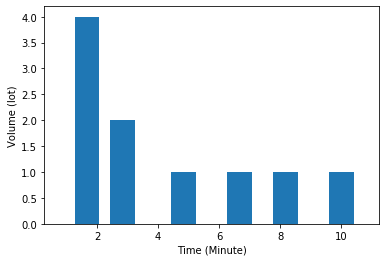



Distances = [0, 50, 0, 30, 0, 30, 40, 40, 50] 
 Route = [3, 3, 8, 8, 5, 5, 8, 4, 8, 3] 
 Distance = 240 
 time = 240 secs 
  Request = [7, 8, 9, 14] 
 Depot =  3 
 Volume = [1, 9, 1, 1] 12 
 AvgCartLoad = 3.0 



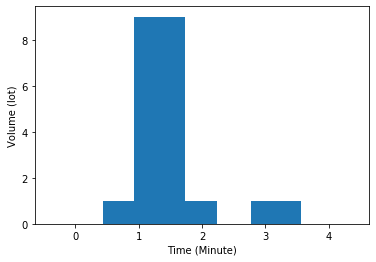



Distances = [0, 110, 0, 60, 20, 40, 0, 80, 40, 110, 10, 70, 70, 30, 30, 90, 20] 
 Route = [3, 3, 14, 14, 8, 10, 14, 14, 6, 2, 13, 14, 7, 14, 11, 14, 5, 3] 
 Distance = 780 
 time = 780 secs 
  Request = [1, 13, 15, 17, 20, 24, 25, 28] 
 Depot =  3 
 Volume = [1, 2, 2, 7, 1, 1, 2, 1] 17 
 AvgCartLoad = 2.125 



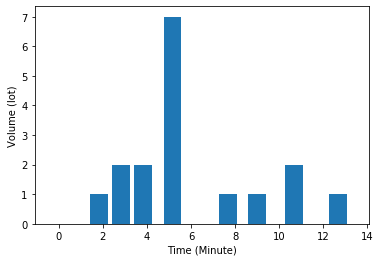



Distances = [10, 80, 10, 80, 50, 50, 0, 70, 30, 40, 80] 
 Route = [3, 2, 10, 9, 1, 6, 11, 11, 4, 7, 11, 3] 
 Distance = 500 
 time = 500 secs 
  Request = [4, 6, 16, 21, 22] 
 Depot =  3 
 Volume = [3, 1, 2, 2, 2] 10 
 AvgCartLoad = 2.0 



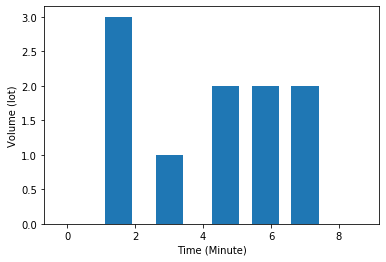



Distances = [20, 120, 120, 130, 110] 
 Route = [3, 1, 13, 1, 14, 3] 
 Distance = 500 
 time = 500 secs 
  Request = [2, 19] 
 Depot =  3 
 Volume = [2, 1] 3 
 AvgCartLoad = 1.5 



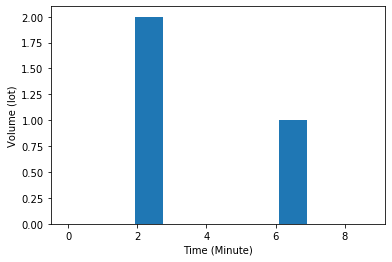

Distances = [20, 130, 130, 120, 100] 
 Route = [3, 1, 14, 1, 13, 3] 
 Distance = 500 
 time = 500 secs 
  Request = [2, 19] 
 Depot =  3 
 Volume = [2, 1] 3 
 AvgCartLoad = 1.5 



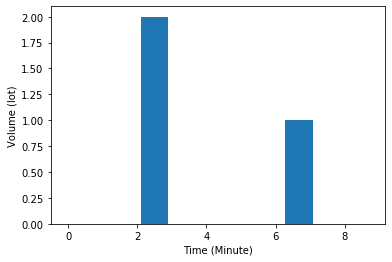



Variance = 0.323900462962963


In [15]:
CFRSKMeans(8,cartposition,pickup,delivery,Volume)


C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  "its corres

[0 0 1 6 6 6 7 7 7 7 1 1 0 7 0 6 0 1 0 0 6 6 6 0 0 1 1 0 1]
Distances = [0, 110, 0, 60, 20, 40, 0, 80, 40, 110, 10, 70, 60, 120, 10, 30, 30, 90, 40, 130, 110] 
 Route = [3, 3, 14, 14, 8, 10, 14, 14, 6, 2, 13, 14, 7, 1, 13, 14, 11, 14, 5, 1, 14, 3] 
 Distance = 1160 
 time = 1160 secs 
  Request = [1, 2, 13, 15, 17, 19, 20, 24, 25, 28] 
 Depot =  3 
 Volume = [1, 2, 2, 2, 7, 1, 1, 1, 2, 1] 20 
 AvgCartLoad = 2.0 





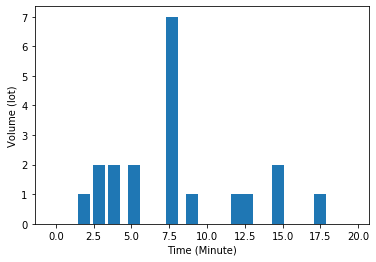



Distances = [10, 90, 10, 30, 0, 70, 70, 50, 50, 60, 60, 30, 30, 80, 20] 
 Route = [3, 2, 11, 10, 13, 13, 6, 13, 8, 13, 7, 13, 10, 13, 5, 3] 
 Distance = 660 
 time = 660 secs 
  Request = [3, 11, 12, 18, 26, 27, 29] 
 Depot =  3 
 Volume = [1, 4, 2, 1, 1, 1, 1] 11 
 AvgCartLoad = 1.5714285714285714 





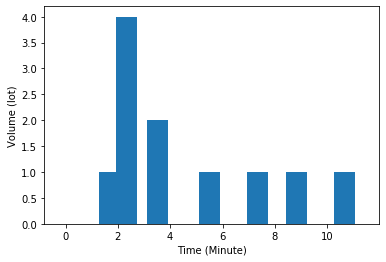



Distances = [10, 80, 0, 60, 20, 50, 0, 70, 30, 40, 20, 80, 60, 30, 70] 
 Route = [3, 2, 10, 10, 4, 6, 11, 11, 4, 7, 11, 9, 1, 7, 10, 3] 
 Distance = 620 
 time = 620 secs 
  Request = [4, 5, 6, 16, 21, 22, 23] 
 Depot =  3 
 Volume = [3, 1, 1, 2, 2, 2, 3] 14 
 AvgCartLoad = 2.0 





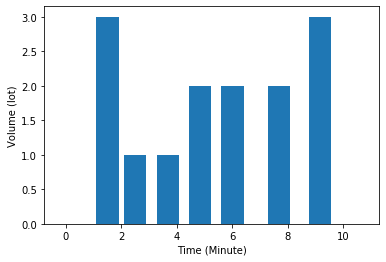



Distances = [0, 50, 0, 30, 0, 30, 40, 40, 60, 40, 30] 
 Route = [3, 3, 8, 8, 5, 5, 8, 4, 8, 2, 6, 3] 
 Distance = 320 
 time = 320 secs 
  Request = [7, 8, 9, 10, 14] 
 Depot =  3 
 Volume = [1, 9, 1, 2, 1] 14 
 AvgCartLoad = 2.8 





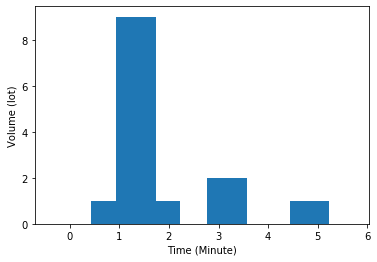

IndexError: list index out of range

In [16]:
CFRSKMedoids(8,cartposition,pickup,delivery,Volume)

In [17]:
statistics.variance([2,1.5714285,2,2.8])

0.26306124931972913

In [18]:
import re as re
df3 = pd.read_csv('Request_Lf_db1.csv')
df3 = df3.reset_index()
df3.columns=['Pickup', 'Constant1','Delivery','Constant2','Volume']
df3 = df3[['Pickup','Delivery','Volume']]

df3['Pickup'] = df3['Pickup'].apply(lambda x: " ".join(re.findall(r'[0-9]+',x)))
df3['Delivery'] = df3['Delivery'].apply(lambda x: " ".join(re.findall(r'[0-9]+',x)))

Volume = df3['Volume'].to_list()
pickup = df3['Pickup'].to_list()
delivery = df3['Delivery'].to_list()
pickup = [int(i) for i in pickup]
delivery = [int(j) for j in delivery]
#df3
#print(pickup,delivery,Volume)

Distances = [0, 50, 0, 30, 0, 30, 40, 40, 50] 
 Route = [3, 3, 8, 8, 5, 5, 8, 4, 8, 3] 
 Distance = 240 
 time = 240 secs 
  Request = [7, 8, 9, 13] 
 Depot =  3 
 Volume = [1, 9, 1, 1] 12 
 AvgCartLoad = 3.0 



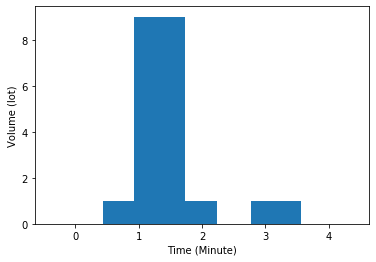



Distances = [70, 30, 0, 70, 70, 50, 50, 60, 60, 30, 30, 80, 20] 
 Route = [3, 10, 13, 13, 6, 13, 8, 13, 7, 13, 10, 13, 5, 3] 
 Distance = 620 
 time = 620 secs 
  Request = [10, 11, 16, 25, 26, 28] 
 Depot =  3 
 Volume = [4, 2, 3, 1, 1, 1] 12 
 AvgCartLoad = 2.0 



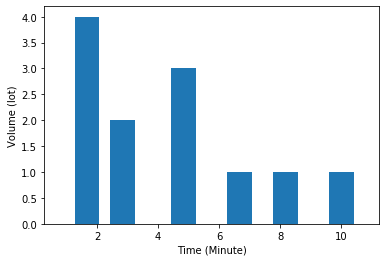



Distances = [40, 30, 0, 60, 10] 
 Route = [3, 7, 10, 10, 4, 3] 
 Distance = 140 
 time = 140 secs 
  Request = [6, 22] 
 Depot =  3 
 Volume = [1, 1] 2 
 AvgCartLoad = 1.0 



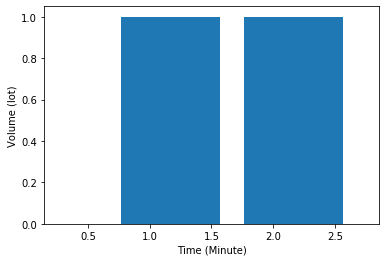



Distances = [0, 110, 0, 60, 20, 40, 0, 80, 40, 110, 10, 70, 70, 30, 30, 90, 20] 
 Route = [3, 3, 14, 14, 8, 10, 14, 14, 6, 2, 13, 14, 7, 14, 11, 14, 5, 3] 
 Distance = 780 
 time = 780 secs 
  Request = [1, 12, 14, 17, 19, 23, 24, 27] 
 Depot =  3 
 Volume = [1, 2, 2, 5, 1, 1, 2, 1] 15 
 AvgCartLoad = 1.875 



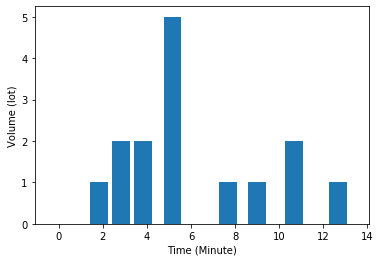



Distances = [0, 80, 0, 70, 20, 50, 20, 80, 60, 40, 80] 
 Route = [3, 3, 11, 11, 4, 6, 11, 9, 1, 7, 11, 3] 
 Distance = 500 
 time = 500 secs 
  Request = [3, 5, 15, 20, 21] 
 Depot =  3 
 Volume = [1, 3, 1, 2, 2] 9 
 AvgCartLoad = 1.8 



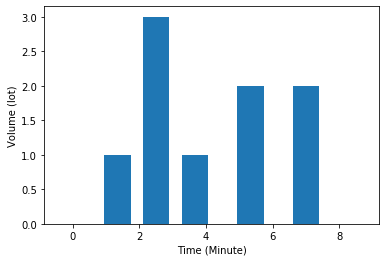



Variance = 0.508625


In [19]:
CFRSKMeans(8,cartposition,pickup,delivery,Volume)

C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  "its corres

[7 7 6 0 6 6 6 6 6 0 0 7 6 7 6 0 7 7 7 6 6 6 7 7 0 0 7 0]
Distances = [10, 90, 10, 30, 0, 70, 70, 50, 50, 60, 60, 30, 30, 80, 20] 
 Route = [3, 2, 11, 10, 13, 13, 6, 13, 8, 13, 7, 13, 10, 13, 5, 3] 
 Distance = 660 
 time = 660 secs 
  Request = [4, 10, 11, 16, 25, 26, 28] 
 Depot =  3 
 Volume = [1, 4, 2, 3, 1, 1, 1] 13 
 AvgCartLoad = 1.8571428571428572 





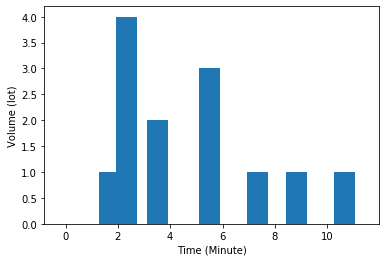



Distances = [0, 50, 0, 30, 0, 30, 10, 40, 0, 70, 0, 40, 10, 30, 0, 60, 10, 80, 20, 80, 50, 50, 80] 
 Route = [3, 3, 8, 8, 5, 5, 8, 7, 11, 11, 4, 4, 8, 7, 10, 10, 4, 3, 11, 9, 1, 6, 11, 3] 
 Distance = 740 
 time = 740 secs 
  Request = [3, 5, 6, 7, 8, 9, 13, 15, 20, 21, 22] 
 Depot =  3 
 Volume = [1, 3, 1, 1, 9, 1, 1, 1, 2, 2, 1] 23 
 AvgCartLoad = 2.090909090909091 





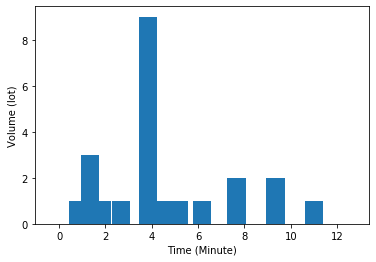



Distances = [0, 110, 0, 60, 20, 40, 0, 80, 40, 110, 10, 70, 60, 120, 10, 30, 30, 90, 40, 130, 110] 
 Route = [3, 3, 14, 14, 8, 10, 14, 14, 6, 2, 13, 14, 7, 1, 13, 14, 11, 14, 5, 1, 14, 3] 
 Distance = 1160 
 time = 1160 secs 
  Request = [1, 2, 12, 14, 17, 18, 19, 23, 24, 27] 
 Depot =  3 
 Volume = [1, 2, 2, 2, 5, 1, 1, 1, 2, 1] 18 
 AvgCartLoad = 1.8 





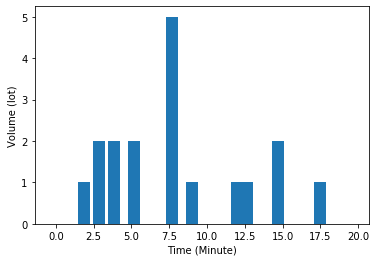

IndexError: list index out of range

In [20]:
CFRSKMedoids(8,cartposition,pickup,delivery,Volume)

In [21]:
statistics.variance([1.8571429,2.0909091,1.8000000])

0.023756675290943365

In [22]:
import re as re
df4 = pd.read_csv('Request_Lf_db10.csv')
df4 = df4.reset_index()
df4.columns=['Pickup', 'Constant1','Delivery','Constant2','Volume']
df4 = df4[['Pickup','Delivery','Volume']]

df4['Pickup'] = df4['Pickup'].apply(lambda x: " ".join(re.findall(r'[0-9]+',x)))
df4['Delivery'] = df4['Delivery'].apply(lambda x: " ".join(re.findall(r'[0-9]+',x)))

Volume = df4['Volume'].to_list()
pickup = df4['Pickup'].to_list()
delivery = df4['Delivery'].to_list()
pickup = [int(i) for i in pickup]
delivery = [int(j) for j in delivery]

print(pickup,delivery,Volume)

[7, 7, 5, 3, 1, 13, 14, 14, 8, 9, 12, 10, 10, 6, 11, 12, 14, 14, 14, 13, 14, 12] [11, 10, 8, 6, 5, 8, 8, 6, 5, 1, 1, 14, 13, 11, 4, 4, 4, 11, 7, 7, 10, 5] [3, 1, 10, 1, 1, 2, 1, 2, 1, 1, 1, 6, 1, 3, 3, 2, 1, 12, 1, 2, 1, 1]


Distances = [70, 30, 0, 50, 50, 60, 40] 
 Route = [3, 10, 13, 13, 8, 13, 7, 3] 
 Distance = 300 
 time = 300 secs 
  Request = [6, 13, 20] 
 Depot =  3 
 Volume = [2, 1, 2] 5 
 AvgCartLoad = 1.6666666666666667 



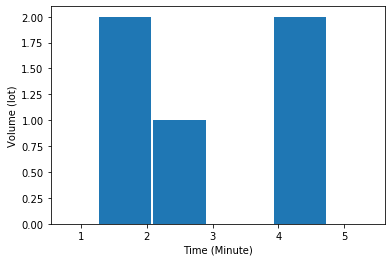



Distances = [20, 30, 0, 30, 20] 
 Route = [3, 5, 8, 8, 5, 3] 
 Distance = 100 
 time = 100 secs 
  Request = [3, 9] 
 Depot =  3 
 Volume = [10, 1] 11 
 AvgCartLoad = 5.5 



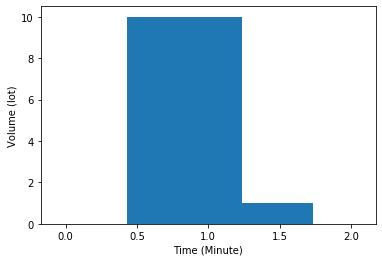



Distances = [30, 50, 0, 70, 30, 40, 20, 80, 20] 
 Route = [3, 6, 11, 11, 4, 7, 11, 9, 1, 3] 
 Distance = 340 
 time = 340 secs 
  Request = [1, 10, 14, 15] 
 Depot =  3 
 Volume = [3, 1, 3, 3] 10 
 AvgCartLoad = 2.5 



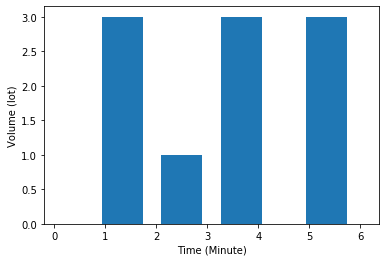



Distances = [70, 40, 0, 60, 40, 110, 130, 80, 80, 100, 100, 30, 30, 70, 70, 40, 70] 
 Route = [3, 10, 14, 14, 8, 12, 1, 14, 6, 14, 4, 14, 11, 14, 7, 14, 10, 3] 
 Distance = 1120 
 time = 1120 secs 
  Request = [7, 8, 11, 12, 17, 18, 19, 21] 
 Depot =  3 
 Volume = [1, 2, 1, 6, 1, 12, 1, 1] 25 
 AvgCartLoad = 3.125 



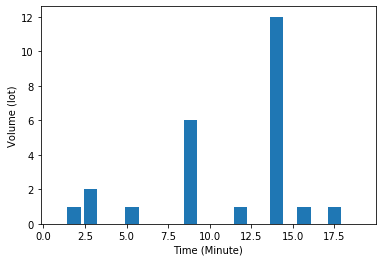



Distances = [0, 30, 30] 
 Route = [3, 3, 6, 3] 
 Distance = 60 
 time = 60 secs 
  Request = [4] 
 Depot =  3 
 Volume = [1] 1 
 AvgCartLoad = 1.0 



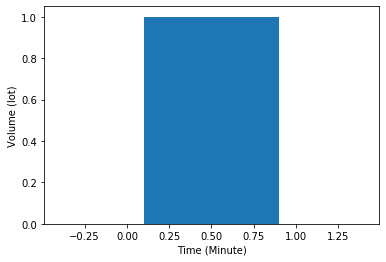



Variance = 3.000347222222222


In [23]:
CFRSKMeans(8,cartposition,pickup,delivery,Volume)

C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 6 is empty! self.labels_[self.medoid_indices_[6]] may not be labeled with its corresponding cluster (6).
  "its corres

[6 6 5 5 5 3 2 2 5 6 2 2 3 6 6 0 2 2 2 3 2 0]
Distances = [90, 70, 70, 80, 10] 
 Route = [3, 12, 5, 12, 4, 3] 
 Distance = 320 
 time = 320 secs 
  Request = [16, 22] 
 Depot =  3 
 Volume = [2, 1] 3 
 AvgCartLoad = 1.5 





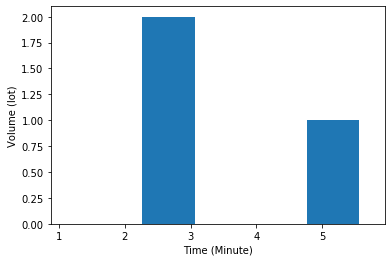



Distances = [70, 40, 0, 60, 40, 110, 130, 80, 80, 100, 100, 30, 30, 70, 70, 40, 70] 
 Route = [3, 10, 14, 14, 8, 12, 1, 14, 6, 14, 4, 14, 11, 14, 7, 14, 10, 3] 
 Distance = 1120 
 time = 1120 secs 
  Request = [7, 8, 11, 12, 17, 18, 19, 21] 
 Depot =  3 
 Volume = [1, 2, 1, 6, 1, 12, 1, 1] 25 
 AvgCartLoad = 3.125 





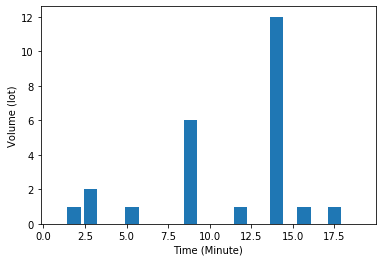



Distances = [70, 30, 0, 50, 50, 60, 40] 
 Route = [3, 10, 13, 13, 8, 13, 7, 3] 
 Distance = 300 
 time = 300 secs 
  Request = [6, 13, 20] 
 Depot =  3 
 Volume = [2, 1, 2] 5 
 AvgCartLoad = 1.6666666666666667 





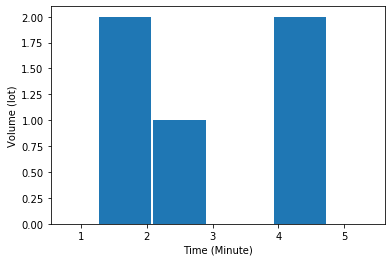



Distances = [0, 30, 10, 30, 0, 30, 40, 40, 20] 
 Route = [3, 3, 6, 5, 8, 8, 5, 1, 5, 3] 
 Distance = 200 
 time = 200 secs 
  Request = [3, 4, 5, 9] 
 Depot =  3 
 Volume = [10, 1, 1, 1] 13 
 AvgCartLoad = 3.25 





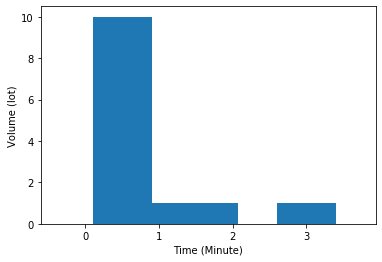



Distances = [30, 50, 0, 70, 30, 40, 20, 80, 60, 30, 70] 
 Route = [3, 6, 11, 11, 4, 7, 11, 9, 1, 7, 10, 3] 
 Distance = 480 
 time = 480 secs 
  Request = [1, 2, 10, 14, 15] 
 Depot =  3 
 Volume = [3, 1, 1, 3, 3] 11 
 AvgCartLoad = 2.2 





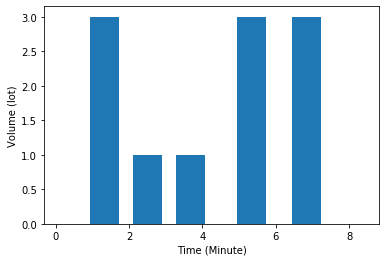



Variance = 0.6556388888888889


In [24]:
CFRSKMedoids(8,cartposition,pickup,delivery,Volume)

In [25]:
statistics.variance([3.125,1.5,1.6666667,2.6666667])

0.6138599504629634

In [26]:
import re as re
df5 = pd.read_csv('Request_Lf_db11.csv')
df5 = df5.reset_index()
df5.columns=['Pickup', 'Constant1','Delivery','Constant2','Volume']
df5 = df5[['Pickup','Delivery','Volume']]

df5['Pickup'] = df5['Pickup'].apply(lambda x: " ".join(re.findall(r'[0-9]+',x)))
df5['Delivery'] = df5['Delivery'].apply(lambda x: " ".join(re.findall(r'[0-9]+',x)))

Volume = df5['Volume'].to_list()
pickup = df5['Pickup'].to_list()
delivery = df5['Delivery'].to_list()
pickup = [int(i) for i in pickup]
delivery = [int(j) for j in delivery]

print(pickup,delivery,Volume)

[7, 7, 1, 5, 3, 13, 14, 14, 8, 9, 12, 10, 10, 6, 11, 12, 13, 14, 14, 13, 14, 12] [11, 10, 7, 8, 6, 8, 8, 6, 5, 1, 1, 14, 13, 11, 4, 4, 4, 11, 7, 7, 10, 5] [3, 1, 1, 10, 2, 2, 1, 2, 1, 1, 1, 6, 1, 3, 3, 2, 1, 11, 2, 1, 1, 1]


Distances = [70, 30, 0, 50, 50, 90, 90, 60, 40] 
 Route = [3, 10, 13, 13, 8, 13, 4, 13, 7, 3] 
 Distance = 480 
 time = 480 secs 
  Request = [6, 13, 17, 20] 
 Depot =  3 
 Volume = [2, 1, 1, 1] 5 
 AvgCartLoad = 1.25 



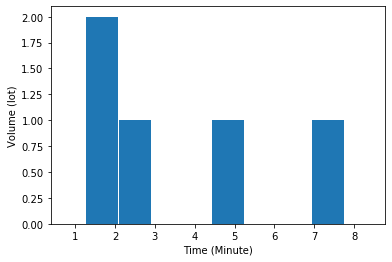



Distances = [20, 30, 0, 30, 20] 
 Route = [3, 5, 8, 8, 5, 3] 
 Distance = 100 
 time = 100 secs 
  Request = [4, 9] 
 Depot =  3 
 Volume = [10, 1] 11 
 AvgCartLoad = 5.5 



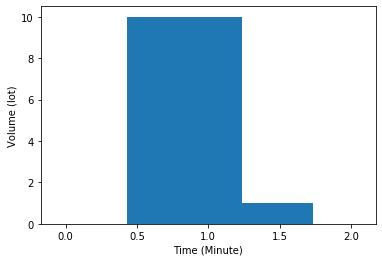



Distances = [30, 50, 0, 70, 30, 40, 20, 80, 20] 
 Route = [3, 6, 11, 11, 4, 7, 11, 9, 1, 3] 
 Distance = 340 
 time = 340 secs 
  Request = [1, 10, 14, 15] 
 Depot =  3 
 Volume = [3, 1, 3, 3] 10 
 AvgCartLoad = 2.5 



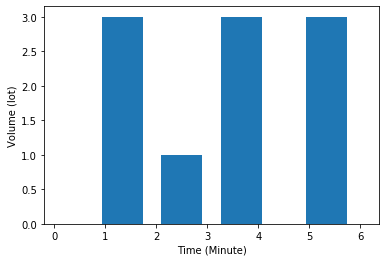



Distances = [70, 40, 0, 60, 40, 110, 130, 80, 80, 30, 30, 70, 70, 40, 70] 
 Route = [3, 10, 14, 14, 8, 12, 1, 14, 6, 14, 11, 14, 7, 14, 10, 3] 
 Distance = 920 
 time = 920 secs 
  Request = [7, 8, 11, 12, 18, 19, 21] 
 Depot =  3 
 Volume = [1, 2, 1, 6, 11, 2, 1] 24 
 AvgCartLoad = 3.4285714285714284 



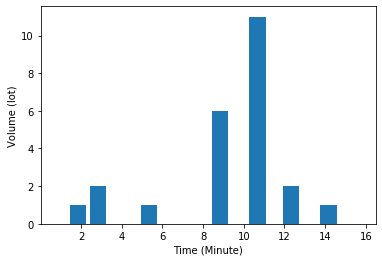



Distances = [0, 30, 30] 
 Route = [3, 3, 6, 3] 
 Distance = 60 
 time = 60 secs 
  Request = [5] 
 Depot =  3 
 Volume = [2] 2 
 AvgCartLoad = 2.0 



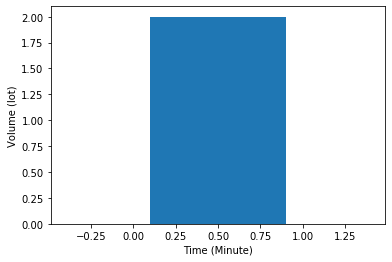



Variance = 2.6813775510204083


In [27]:
CFRSKMeans(8,cartposition,pickup,delivery,Volume)

C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be labeled with its corresponding cluster (5).
  "its corres

[7 7 6 6 6 2 1 1 6 7 1 1 2 7 7 0 2 1 1 2 1 0]
Distances = [90, 70, 70, 80, 10] 
 Route = [3, 12, 5, 12, 4, 3] 
 Distance = 320 
 time = 320 secs 
  Request = [16, 22] 
 Depot =  3 
 Volume = [2, 1] 3 
 AvgCartLoad = 1.5 





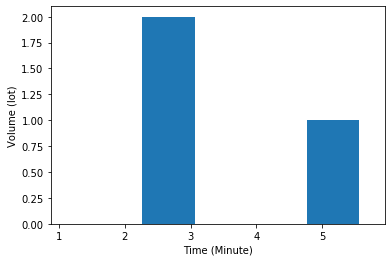



Distances = [70, 40, 0, 60, 40, 110, 130, 80, 80, 30, 30, 70, 70, 40, 70] 
 Route = [3, 10, 14, 14, 8, 12, 1, 14, 6, 14, 11, 14, 7, 14, 10, 3] 
 Distance = 920 
 time = 920 secs 
  Request = [7, 8, 11, 12, 18, 19, 21] 
 Depot =  3 
 Volume = [1, 2, 1, 6, 11, 2, 1] 24 
 AvgCartLoad = 3.4285714285714284 





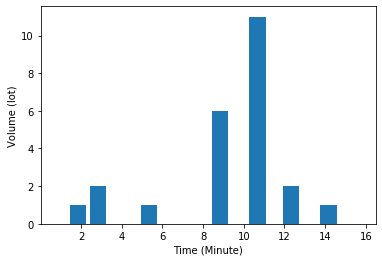



Distances = [70, 30, 0, 50, 50, 90, 90, 60, 40] 
 Route = [3, 10, 13, 13, 8, 13, 4, 13, 7, 3] 
 Distance = 480 
 time = 480 secs 
  Request = [6, 13, 17, 20] 
 Depot =  3 
 Volume = [2, 1, 1, 1] 5 
 AvgCartLoad = 1.25 





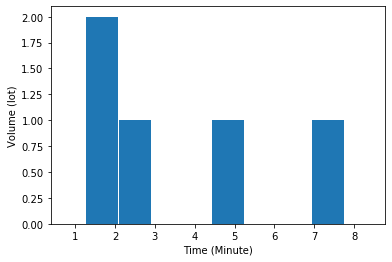



Distances = [0, 30, 10, 30, 0, 30, 40, 60, 40] 
 Route = [3, 3, 6, 5, 8, 8, 5, 1, 7, 3] 
 Distance = 240 
 time = 240 secs 
  Request = [3, 4, 5, 9] 
 Depot =  3 
 Volume = [1, 10, 2, 1] 14 
 AvgCartLoad = 3.5 





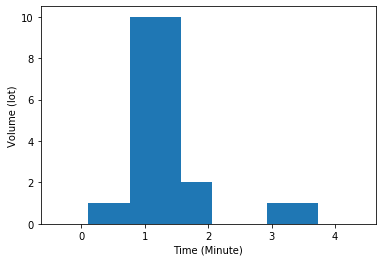



Distances = [30, 50, 0, 70, 30, 40, 20, 80, 60, 30, 70] 
 Route = [3, 6, 11, 11, 4, 7, 11, 9, 1, 7, 10, 3] 
 Distance = 480 
 time = 480 secs 
  Request = [1, 2, 10, 14, 15] 
 Depot =  3 
 Volume = [3, 1, 1, 3, 3] 11 
 AvgCartLoad = 2.2 





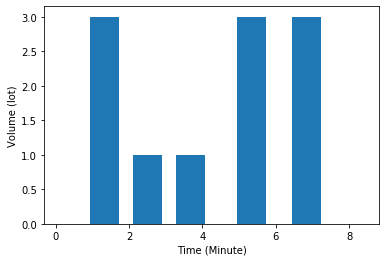



Variance = 1.109377551020408


In [28]:
CFRSKMedoids(8,cartposition,pickup,delivery,Volume)

In [184]:
statistics.variance([2.7777,3.4285714,1.25,1.5])

1.0765065957611566

In [29]:
import re as re
df6 = pd.read_csv('Request_Lf_db12.csv')
df6 = df6.reset_index()
df6.columns=['Pickup', 'Constant1','Delivery','Constant2','Volume']
df6 = df6[['Pickup','Delivery','Volume']]

df6['Pickup'] = df6['Pickup'].apply(lambda x: " ".join(re.findall(r'[0-9]+',x)))
df6['Delivery'] = df6['Delivery'].apply(lambda x: " ".join(re.findall(r'[0-9]+',x)))

Volume = df6['Volume'].to_list()
pickup = df6['Pickup'].to_list()
delivery = df6['Delivery'].to_list()
pickup = [int(i) for i in pickup]
delivery = [int(j) for j in delivery]

print(pickup,delivery,Volume)

[7, 7, 1, 5, 3, 13, 14, 14, 8, 9, 12, 10, 10, 6, 11, 13, 12, 14, 13, 14, 13, 14, 12] [11, 10, 7, 8, 6, 8, 8, 6, 5, 1, 1, 14, 13, 11, 4, 4, 4, 11, 1, 7, 7, 10, 5] [3, 1, 1, 10, 1, 2, 1, 2, 1, 1, 1, 6, 1, 3, 3, 1, 1, 11, 1, 2, 1, 1, 1]


Distances = [100, 120, 20] 
 Route = [3, 13, 1, 3] 
 Distance = 240 
 time = 240 secs 
  Request = [19] 
 Depot =  3 
 Volume = [1] 1 
 AvgCartLoad = 1.0 



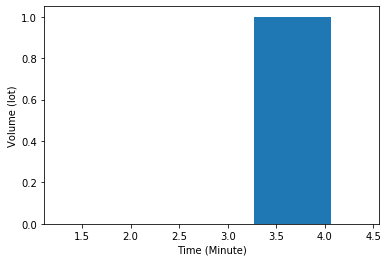



Distances = [20, 60, 0, 30, 70] 
 Route = [3, 1, 7, 7, 10, 3] 
 Distance = 180 
 time = 180 secs 
  Request = [2, 3] 
 Depot =  3 
 Volume = [1, 1] 2 
 AvgCartLoad = 1.0 



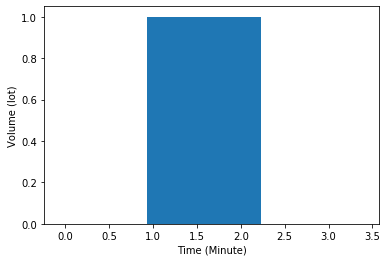



Distances = [70, 30, 0, 50, 50, 90, 90, 60, 40] 
 Route = [3, 10, 13, 13, 8, 13, 4, 13, 7, 3] 
 Distance = 480 
 time = 480 secs 
  Request = [6, 13, 16, 21] 
 Depot =  3 
 Volume = [2, 1, 1, 1] 5 
 AvgCartLoad = 1.25 



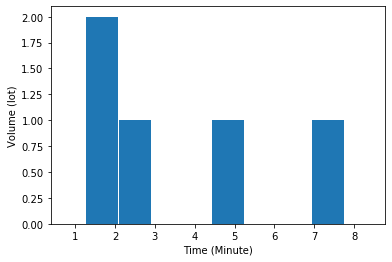



Distances = [0, 30, 30] 
 Route = [3, 3, 6, 3] 
 Distance = 60 
 time = 60 secs 
  Request = [5] 
 Depot =  3 
 Volume = [1] 1 
 AvgCartLoad = 1.0 



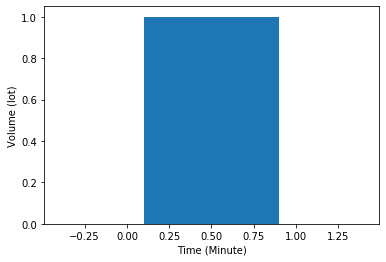



Distances = [20, 30, 0, 30, 20] 
 Route = [3, 5, 8, 8, 5, 3] 
 Distance = 100 
 time = 100 secs 
  Request = [4, 9] 
 Depot =  3 
 Volume = [10, 1] 11 
 AvgCartLoad = 5.5 



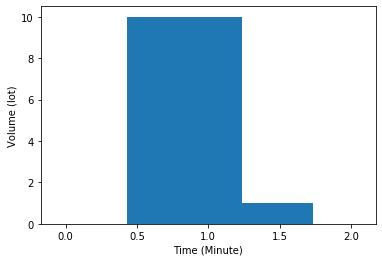



Variance = 3.9499999999999997


In [30]:
CFRSKMeans(8,cartposition,pickup,delivery,Volume)

C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be labeled with its corresponding cluster (5).
  "its corres

[7 7 6 6 6 1 0 0 6 7 0 0 1 7 7 1 4 0 0 0 1 0 4]
Distances = [70, 40, 0, 60, 40, 110, 120, 120, 130, 80, 80, 30, 30, 70, 70, 40, 70] 
 Route = [3, 10, 14, 14, 8, 12, 1, 13, 1, 14, 6, 14, 11, 14, 7, 14, 10, 3] 
 Distance = 1160 
 time = 1160 secs 
  Request = [7, 8, 11, 12, 18, 19, 20, 22] 
 Depot =  3 
 Volume = [1, 2, 1, 6, 11, 1, 2, 1] 25 
 AvgCartLoad = 3.125 





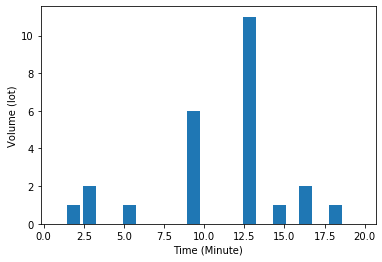



Distances = [70, 30, 0, 50, 50, 90, 90, 60, 40] 
 Route = [3, 10, 13, 13, 8, 13, 4, 13, 7, 3] 
 Distance = 480 
 time = 480 secs 
  Request = [6, 13, 16, 21] 
 Depot =  3 
 Volume = [2, 1, 1, 1] 5 
 AvgCartLoad = 1.25 





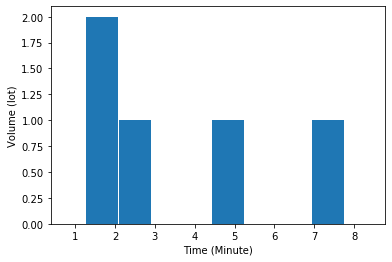



Distances = [90, 70, 70, 80, 10] 
 Route = [3, 12, 5, 12, 4, 3] 
 Distance = 320 
 time = 320 secs 
  Request = [17, 23] 
 Depot =  3 
 Volume = [1, 1] 2 
 AvgCartLoad = 1.0 





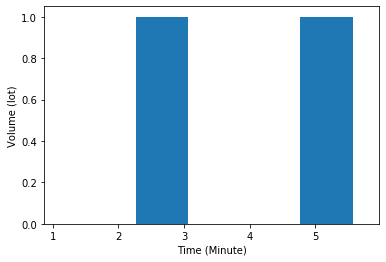



Distances = [0, 30, 10, 30, 0, 30, 40, 60, 40] 
 Route = [3, 3, 6, 5, 8, 8, 5, 1, 7, 3] 
 Distance = 240 
 time = 240 secs 
  Request = [3, 4, 5, 9] 
 Depot =  3 
 Volume = [1, 10, 1, 1] 13 
 AvgCartLoad = 3.25 





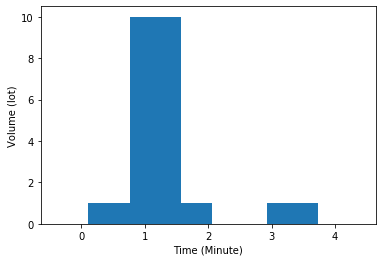



Distances = [30, 50, 0, 70, 30, 40, 20, 80, 60, 30, 70] 
 Route = [3, 6, 11, 11, 4, 7, 11, 9, 1, 7, 10, 3] 
 Distance = 480 
 time = 480 secs 
  Request = [1, 2, 10, 14, 15] 
 Depot =  3 
 Volume = [3, 1, 1, 3, 3] 11 
 AvgCartLoad = 2.2 





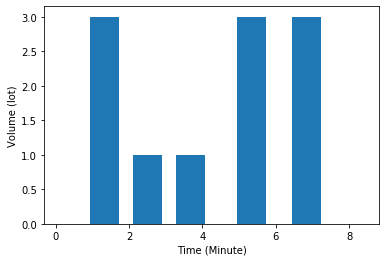



Variance = 1.073625


In [31]:
CFRSKMedoids(8,cartposition,pickup,delivery,Volume)

In [75]:
statistics.variance([3.125,1.1666667,2.6666667])

1.0491897879629632

In [32]:
import re as re
df7 = pd.read_csv('Request_Lf_db13.csv')
df7 = df7.reset_index()
df7.columns=['Pickup', 'Constant1','Delivery','Constant2','Volume']
df7 = df7[['Pickup','Delivery','Volume']]

df7['Pickup'] = df7['Pickup'].apply(lambda x: " ".join(re.findall(r'[0-9]+',x)))
df7['Delivery'] = df7['Delivery'].apply(lambda x: " ".join(re.findall(r'[0-9]+',x)))

Volume = df7['Volume'].to_list()
pickup = df7['Pickup'].to_list()
delivery = df7['Delivery'].to_list()
pickup = [int(i) for i in pickup]
delivery = [int(j) for j in delivery]

print(pickup,delivery,Volume)

[7, 7, 1, 5, 13, 14, 14, 8, 9, 10, 10, 2, 6, 11, 14, 14, 13, 13, 14, 12, 13] [11, 10, 7, 8, 8, 8, 6, 5, 1, 14, 13, 13, 11, 4, 11, 1, 7, 10, 10, 5, 6] [3, 1, 1, 10, 2, 1, 1, 1, 1, 5, 2, 1, 1, 2, 12, 1, 3, 2, 1, 1, 1]


Distances = [30, 50, 0, 70, 30, 40, 20, 80, 20] 
 Route = [3, 6, 11, 11, 4, 7, 11, 9, 1, 3] 
 Distance = 340 
 time = 340 secs 
  Request = [1, 9, 13, 14] 
 Depot =  3 
 Volume = [3, 1, 1, 2] 7 
 AvgCartLoad = 1.75 



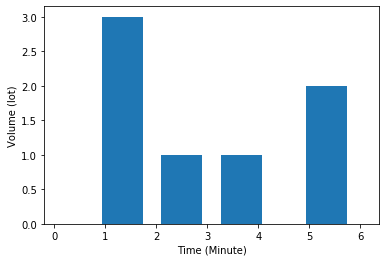



Distances = [10, 110, 10, 60, 20, 40, 0, 80, 80, 30, 30, 40, 70] 
 Route = [3, 2, 13, 14, 8, 10, 14, 14, 6, 14, 11, 14, 10, 3] 
 Distance = 580 
 time = 580 secs 
  Request = [6, 7, 10, 12, 15, 19] 
 Depot =  3 
 Volume = [1, 1, 5, 1, 12, 1] 21 
 AvgCartLoad = 3.5 



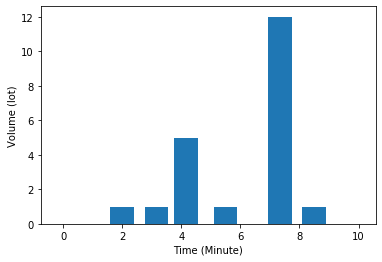



Distances = [20, 30, 0, 30, 20] 
 Route = [3, 5, 8, 8, 5, 3] 
 Distance = 100 
 time = 100 secs 
  Request = [4, 8] 
 Depot =  3 
 Volume = [10, 1] 11 
 AvgCartLoad = 5.5 



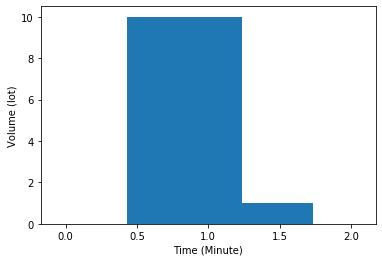



Distances = [70, 30, 0, 50, 50, 60, 60, 30, 30, 70, 30] 
 Route = [3, 10, 13, 13, 8, 13, 7, 13, 10, 13, 6, 3] 
 Distance = 480 
 time = 480 secs 
  Request = [5, 11, 17, 18, 21] 
 Depot =  3 
 Volume = [2, 2, 3, 2, 1] 10 
 AvgCartLoad = 2.0 



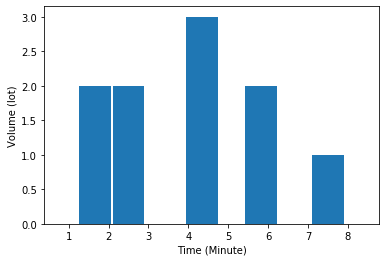



Distances = [110, 130, 20] 
 Route = [3, 14, 1, 3] 
 Distance = 260 
 time = 260 secs 
  Request = [16] 
 Depot =  3 
 Volume = [1] 1 
 AvgCartLoad = 1.0 



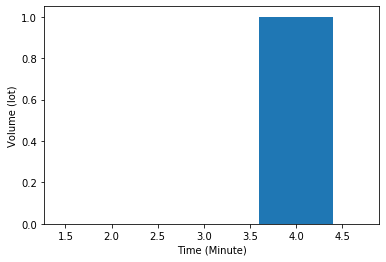



Variance = 3.1875


In [33]:
CFRSKMeans(8,cartposition,pickup,delivery,Volume)

C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  "its corres

[5 5 5 5 0 6 6 5 5 6 0 6 5 5 6 6 0 0 6 0 0]
Distances = [70, 30, 0, 50, 40, 70, 80, 60, 60, 30, 30, 70, 30] 
 Route = [3, 10, 13, 13, 8, 12, 5, 13, 7, 13, 10, 13, 6, 3] 
 Distance = 620 
 time = 620 secs 
  Request = [5, 11, 17, 18, 20, 21] 
 Depot =  3 
 Volume = [2, 2, 3, 2, 1, 1] 11 
 AvgCartLoad = 1.8333333333333333 





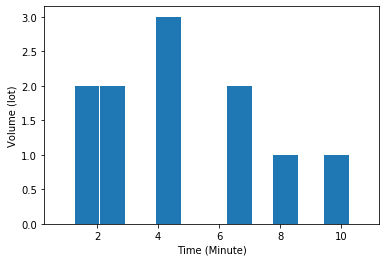



Distances = [20, 30, 0, 30, 10, 50, 0, 70, 30, 40, 20, 80, 0, 60, 0, 30, 70] 
 Route = [3, 5, 8, 8, 5, 6, 11, 11, 4, 7, 11, 9, 1, 1, 7, 7, 10, 3] 
 Distance = 540 
 time = 540 secs 
  Request = [1, 2, 3, 4, 8, 9, 13, 14] 
 Depot =  3 
 Volume = [3, 1, 1, 10, 1, 1, 1, 2] 20 
 AvgCartLoad = 2.5 





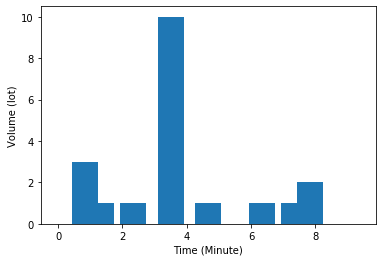



Distances = [10, 110, 10, 60, 20, 40, 0, 80, 80, 30, 30, 130, 130, 40, 70] 
 Route = [3, 2, 13, 14, 8, 10, 14, 14, 6, 14, 11, 14, 1, 14, 10, 3] 
 Distance = 840 
 time = 840 secs 
  Request = [6, 7, 10, 12, 15, 16, 19] 
 Depot =  3 
 Volume = [1, 1, 5, 1, 12, 1, 1] 22 
 AvgCartLoad = 3.142857142857143 





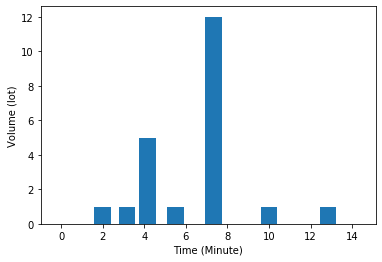

IndexError: list index out of range

In [34]:
CFRSKMedoids(8,cartposition,pickup,delivery,Volume)

In [79]:
statistics.variance([1.8333333,2.5,3.1428571])

0.4287603871126233

In [35]:
import re as re
df8 = pd.read_csv('Request_Lf_db14.csv')
df8 = df8.reset_index()
df8.columns=['Pickup', 'Constant1','Delivery','Constant2','Volume']
df8 = df8[['Pickup','Delivery','Volume']]

df8['Pickup'] = df8['Pickup'].apply(lambda x: " ".join(re.findall(r'[0-9]+',x)))
df8['Delivery'] = df8['Delivery'].apply(lambda x: " ".join(re.findall(r'[0-9]+',x)))

Volume = df8['Volume'].to_list()
pickup = df8['Pickup'].to_list()
delivery = df8['Delivery'].to_list()
pickup = [int(i) for i in pickup]
delivery = [int(j) for j in delivery]

print(pickup,delivery,Volume)

[7, 7, 1, 5, 13, 14, 14, 8, 9, 12, 10, 10, 2, 6, 11, 13, 14, 14, 13, 13, 14, 12, 13] [11, 10, 7, 8, 8, 8, 6, 5, 1, 1, 14, 13, 13, 11, 4, 4, 11, 1, 7, 10, 10, 5, 6] [3, 1, 1, 10, 3, 1, 1, 1, 1, 1, 5, 2, 1, 1, 2, 1, 12, 1, 3, 2, 1, 1, 1]


Distances = [10, 110, 10, 60, 20, 40, 0, 80, 60, 110, 130, 30, 30, 40, 70] 
 Route = [3, 2, 13, 14, 8, 10, 14, 14, 6, 12, 1, 14, 11, 14, 10, 3] 
 Distance = 800 
 time = 800 secs 
  Request = [6, 7, 10, 11, 13, 17, 21] 
 Depot =  3 
 Volume = [1, 1, 1, 5, 1, 12, 1] 22 
 AvgCartLoad = 3.142857142857143 



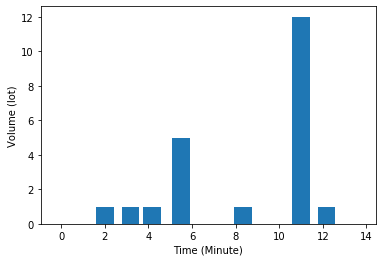



Distances = [30, 50, 0, 70, 30, 40, 20, 80, 20] 
 Route = [3, 6, 11, 11, 4, 7, 11, 9, 1, 3] 
 Distance = 340 
 time = 340 secs 
  Request = [1, 9, 14, 15] 
 Depot =  3 
 Volume = [3, 1, 1, 2] 7 
 AvgCartLoad = 1.75 



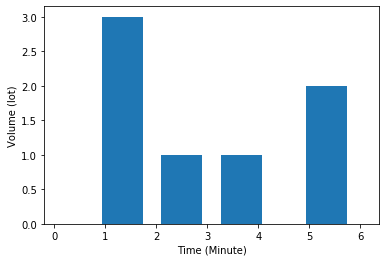



Distances = [20, 30, 0, 30, 20] 
 Route = [3, 5, 8, 8, 5, 3] 
 Distance = 100 
 time = 100 secs 
  Request = [4, 8] 
 Depot =  3 
 Volume = [10, 1] 11 
 AvgCartLoad = 5.5 



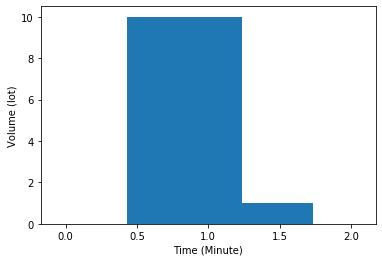



Distances = [70, 30, 0, 50, 50, 90, 90, 60, 60, 30, 30, 70, 30] 
 Route = [3, 10, 13, 13, 8, 13, 4, 13, 7, 13, 10, 13, 6, 3] 
 Distance = 660 
 time = 660 secs 
  Request = [5, 12, 16, 19, 20, 23] 
 Depot =  3 
 Volume = [3, 2, 1, 3, 2, 1] 12 
 AvgCartLoad = 2.0 



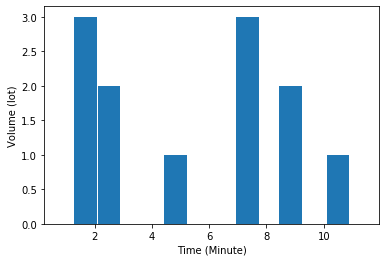



Distances = [110, 130, 20] 
 Route = [3, 14, 1, 3] 
 Distance = 260 
 time = 260 secs 
  Request = [18] 
 Depot =  3 
 Volume = [1] 1 
 AvgCartLoad = 1.0 



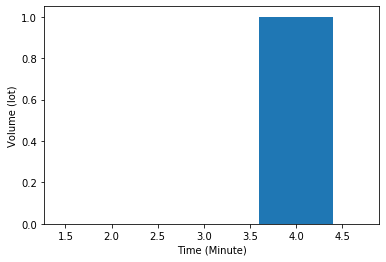



Variance = 3.079081632653061


In [36]:
CFRSKMeans(8,cartposition,pickup,delivery,Volume)

C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  "its corres

[5 5 5 5 0 7 7 5 5 7 7 0 7 5 5 0 7 7 0 0 7 0 0]
Distances = [70, 30, 0, 50, 40, 70, 80, 90, 90, 60, 60, 30, 30, 70, 30] 
 Route = [3, 10, 13, 13, 8, 12, 5, 13, 4, 13, 7, 13, 10, 13, 6, 3] 
 Distance = 800 
 time = 800 secs 
  Request = [5, 12, 16, 19, 20, 22, 23] 
 Depot =  3 
 Volume = [3, 2, 1, 3, 2, 1, 1] 13 
 AvgCartLoad = 1.8571428571428572 





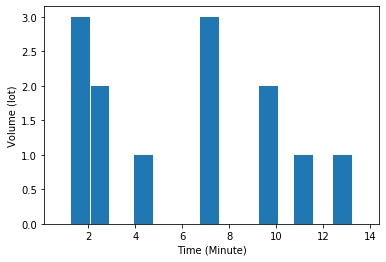



Distances = [20, 30, 0, 30, 10, 50, 0, 70, 30, 40, 20, 80, 0, 60, 0, 30, 70] 
 Route = [3, 5, 8, 8, 5, 6, 11, 11, 4, 7, 11, 9, 1, 1, 7, 7, 10, 3] 
 Distance = 540 
 time = 540 secs 
  Request = [1, 2, 3, 4, 8, 9, 14, 15] 
 Depot =  3 
 Volume = [3, 1, 1, 10, 1, 1, 1, 2] 20 
 AvgCartLoad = 2.5 





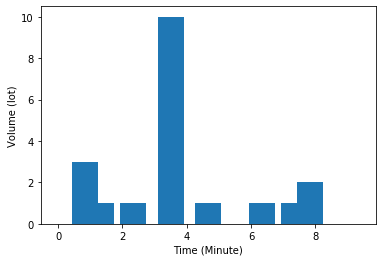



Distances = [10, 110, 10, 60, 20, 40, 0, 80, 60, 110, 130, 30, 30, 130, 130, 40, 70] 
 Route = [3, 2, 13, 14, 8, 10, 14, 14, 6, 12, 1, 14, 11, 14, 1, 14, 10, 3] 
 Distance = 1060 
 time = 1060 secs 
  Request = [6, 7, 10, 11, 13, 17, 18, 21] 
 Depot =  3 
 Volume = [1, 1, 1, 5, 1, 12, 1, 1] 23 
 AvgCartLoad = 2.875 





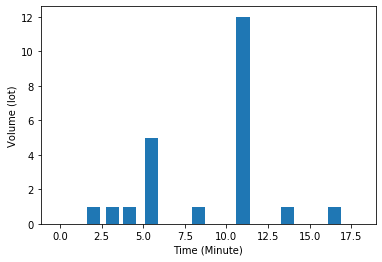

IndexError: list index out of range

In [37]:
CFRSKMedoids(8,cartposition,pickup,delivery,Volume)

In [83]:
statistics.variance([1.8571429,2.5,2.875])

0.26498722117347007

In [38]:
import re as re
df9 = pd.read_csv('Request_Lf_db15.csv')
df9 = df9.reset_index()
df9.columns=['Pickup', 'Constant1','Delivery','Constant2','Volume']
df9 = df9[['Pickup','Delivery','Volume']]

df9['Pickup'] = df9['Pickup'].apply(lambda x: " ".join(re.findall(r'[0-9]+',x)))
df9['Delivery'] = df9['Delivery'].apply(lambda x: " ".join(re.findall(r'[0-9]+',x)))

Volume = df9['Volume'].to_list()
pickup = df9['Pickup'].to_list()
delivery = df9['Delivery'].to_list()
pickup = [int(i) for i in pickup]
delivery = [int(j) for j in delivery]

print(pickup,delivery,Volume)

[7, 7, 1, 5, 13, 14, 14, 8, 9, 10, 10, 2, 6, 14, 13, 14, 13, 14, 12] [11, 10, 7, 8, 8, 8, 6, 5, 14, 14, 13, 13, 11, 11, 7, 7, 10, 5, 6] [3, 1, 1, 10, 3, 1, 1, 1, 1, 5, 2, 1, 1, 12, 2, 1, 2, 1, 1]


Distances = [30, 50, 40, 40, 80] 
 Route = [3, 6, 11, 7, 11, 3] 
 Distance = 240 
 time = 240 secs 
  Request = [1, 13] 
 Depot =  3 
 Volume = [3, 1] 4 
 AvgCartLoad = 2.0 



C:\Users\peace\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.


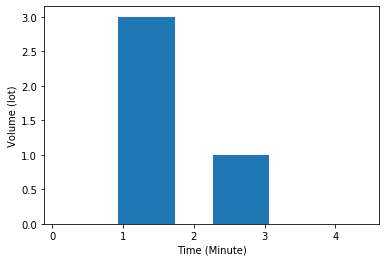



Distances = [10, 110, 10, 60, 10, 50, 0, 80, 40, 40, 0, 30, 30, 70, 70, 90, 20] 
 Route = [3, 2, 13, 14, 8, 9, 14, 14, 6, 10, 14, 14, 11, 14, 7, 14, 5, 3] 
 Distance = 720 
 time = 720 secs 
  Request = [6, 7, 9, 10, 12, 14, 16, 18] 
 Depot =  3 
 Volume = [1, 1, 1, 5, 1, 12, 1, 1] 23 
 AvgCartLoad = 2.875 



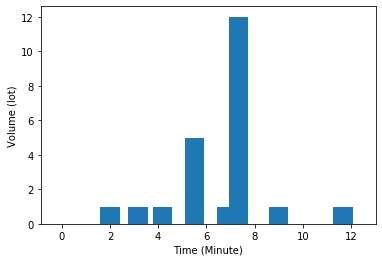



Distances = [20, 30, 0, 30, 20] 
 Route = [3, 5, 8, 8, 5, 3] 
 Distance = 100 
 time = 100 secs 
  Request = [4, 8] 
 Depot =  3 
 Volume = [10, 1] 11 
 AvgCartLoad = 5.5 



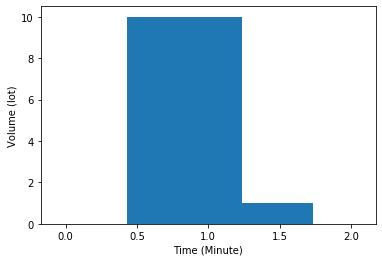



Distances = [70, 30, 0, 50, 50, 60, 60, 30, 70] 
 Route = [3, 10, 13, 13, 8, 13, 7, 13, 10, 3] 
 Distance = 420 
 time = 420 secs 
  Request = [5, 11, 15, 17] 
 Depot =  3 
 Volume = [3, 2, 2, 2] 9 
 AvgCartLoad = 2.25 



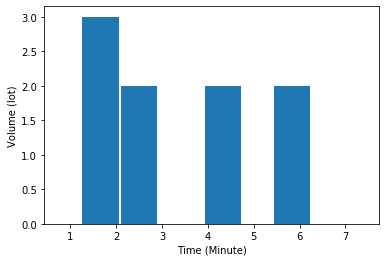



Distances = [20, 60, 40] 
 Route = [3, 1, 7, 3] 
 Distance = 120 
 time = 120 secs 
  Request = [3] 
 Depot =  3 
 Volume = [1] 1 
 AvgCartLoad = 1.0 



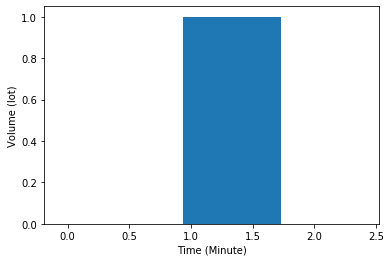



Variance = 2.8625000000000003


In [39]:
CFRSKMeans(8,cartposition,pickup,delivery,Volume)

In [123]:
statistics.variance([1,1,2.25,1,5.5,2.875,2])

2.6168154761904763

C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be labeled with its corresponding cluster (5).
  "its corres

[2 2 2 2 3 0 0 2 0 0 3 0 2 0 3 0 3 0 3]
Distances = [10, 110, 10, 60, 10, 50, 0, 80, 40, 40, 0, 30, 30, 70, 70, 90, 20] 
 Route = [3, 2, 13, 14, 8, 9, 14, 14, 6, 10, 14, 14, 11, 14, 7, 14, 5, 3] 
 Distance = 720 
 time = 720 secs 
  Request = [6, 7, 9, 10, 12, 14, 16, 18] 
 Depot =  3 
 Volume = [1, 1, 1, 5, 1, 12, 1, 1] 23 
 AvgCartLoad = 2.875 





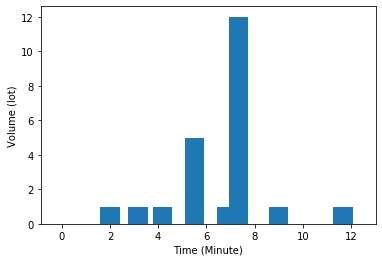



Distances = [20, 30, 0, 30, 10, 50, 40, 40, 40, 30, 90, 60, 40] 
 Route = [3, 5, 8, 8, 5, 6, 11, 7, 11, 7, 10, 1, 7, 3] 
 Distance = 480 
 time = 480 secs 
  Request = [1, 2, 3, 4, 8, 13] 
 Depot =  3 
 Volume = [3, 1, 1, 10, 1, 1] 17 
 AvgCartLoad = 2.8333333333333335 





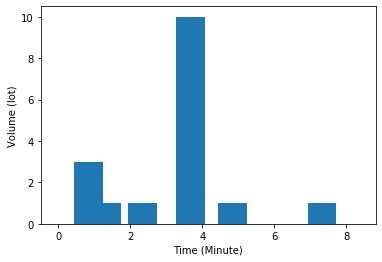



Distances = [70, 30, 0, 50, 40, 60, 70, 60, 60, 30, 70] 
 Route = [3, 10, 13, 13, 8, 12, 6, 13, 7, 13, 10, 3] 
 Distance = 540 
 time = 540 secs 
  Request = [5, 11, 15, 17, 19] 
 Depot =  3 
 Volume = [3, 2, 2, 2, 1] 10 
 AvgCartLoad = 2.0 





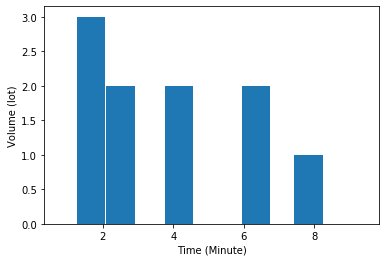

IndexError: list index out of range

In [40]:
CFRSKMedoids(8,cartposition,pickup,delivery,Volume)

In [88]:
statistics.variance([2.8333333,2.0,2.875])

0.24363425046296336

In [41]:
import re as re
df10 = pd.read_csv('Request_Lf_db16.csv')
df10 = df10.reset_index()
df10.columns=['Pickup', 'Constant1','Delivery','Constant2','Volume']
df10 = df10[['Pickup','Delivery','Volume']]

df10['Pickup'] = df10['Pickup'].apply(lambda x: " ".join(re.findall(r'[0-9]+',x)))
df10['Delivery'] = df10['Delivery'].apply(lambda x: " ".join(re.findall(r'[0-9]+',x)))

Volume = df10['Volume'].to_list()
pickup = df10['Pickup'].to_list()
delivery = df10['Delivery'].to_list()
pickup = [int(i) for i in pickup]
delivery = [int(j) for j in delivery]

print(pickup,delivery,Volume)

[7, 7, 1, 5, 13, 14, 14, 8, 9, 10, 10, 2, 6, 14, 13, 14, 13, 14, 12] [11, 10, 7, 8, 8, 8, 6, 5, 14, 14, 13, 13, 11, 11, 7, 7, 10, 5, 6] [3, 1, 1, 10, 3, 1, 1, 1, 1, 5, 2, 1, 1, 12, 2, 1, 2, 1, 1]


Distances = [30, 50, 40, 40, 80] 
 Route = [3, 6, 11, 7, 11, 3] 
 Distance = 240 
 time = 240 secs 
  Request = [1, 13] 
 Depot =  3 
 Volume = [3, 1] 4 
 AvgCartLoad = 2.0 



C:\Users\peace\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.


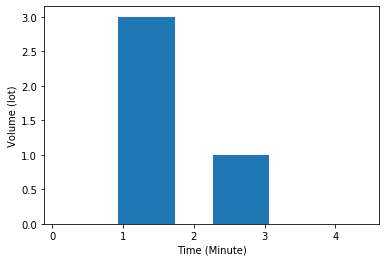



Distances = [10, 110, 10, 60, 10, 50, 0, 80, 40, 40, 0, 30, 30, 70, 70, 90, 20] 
 Route = [3, 2, 13, 14, 8, 9, 14, 14, 6, 10, 14, 14, 11, 14, 7, 14, 5, 3] 
 Distance = 720 
 time = 720 secs 
  Request = [6, 7, 9, 10, 12, 14, 16, 18] 
 Depot =  3 
 Volume = [1, 1, 1, 5, 1, 12, 1, 1] 23 
 AvgCartLoad = 2.875 



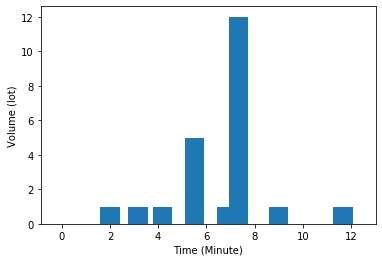



Distances = [20, 30, 0, 30, 20] 
 Route = [3, 5, 8, 8, 5, 3] 
 Distance = 100 
 time = 100 secs 
  Request = [4, 8] 
 Depot =  3 
 Volume = [10, 1] 11 
 AvgCartLoad = 5.5 



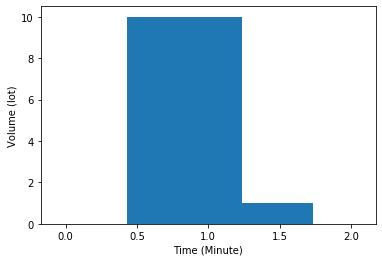



Distances = [70, 30, 0, 50, 50, 60, 60, 30, 70] 
 Route = [3, 10, 13, 13, 8, 13, 7, 13, 10, 3] 
 Distance = 420 
 time = 420 secs 
  Request = [5, 11, 15, 17] 
 Depot =  3 
 Volume = [3, 2, 2, 2] 9 
 AvgCartLoad = 2.25 



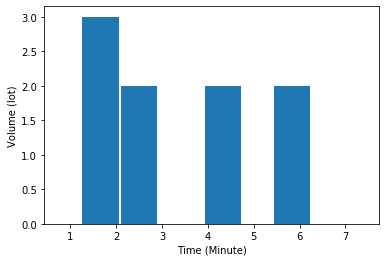



Distances = [20, 60, 40] 
 Route = [3, 1, 7, 3] 
 Distance = 120 
 time = 120 secs 
  Request = [3] 
 Depot =  3 
 Volume = [1] 1 
 AvgCartLoad = 1.0 



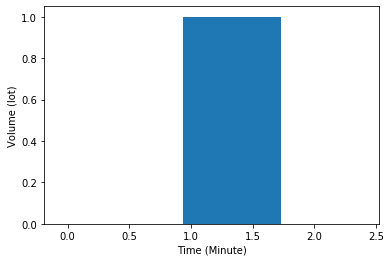



Variance = 2.8625000000000003


In [42]:
CFRSKMeans(8,cartposition,pickup,delivery,Volume)

In [127]:
statistics.variance([1,1,1,2.25,5.5,2.875,2])

2.6168154761904763

C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be labeled with its corresponding cluster (5).
  "its corres

[2 2 2 2 3 0 0 2 0 0 3 0 2 0 3 0 3 0 3]
Distances = [10, 110, 10, 60, 10, 50, 0, 80, 40, 40, 0, 30, 30, 70, 70, 90, 20] 
 Route = [3, 2, 13, 14, 8, 9, 14, 14, 6, 10, 14, 14, 11, 14, 7, 14, 5, 3] 
 Distance = 720 
 time = 720 secs 
  Request = [6, 7, 9, 10, 12, 14, 16, 18] 
 Depot =  3 
 Volume = [1, 1, 1, 5, 1, 12, 1, 1] 23 
 AvgCartLoad = 2.875 





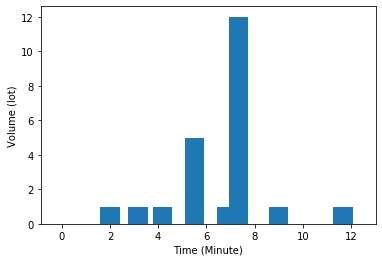



Distances = [20, 30, 0, 30, 10, 50, 40, 40, 40, 30, 90, 60, 40] 
 Route = [3, 5, 8, 8, 5, 6, 11, 7, 11, 7, 10, 1, 7, 3] 
 Distance = 480 
 time = 480 secs 
  Request = [1, 2, 3, 4, 8, 13] 
 Depot =  3 
 Volume = [3, 1, 1, 10, 1, 1] 17 
 AvgCartLoad = 2.8333333333333335 





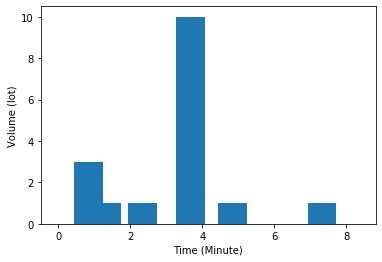



Distances = [70, 30, 0, 50, 40, 60, 70, 60, 60, 30, 70] 
 Route = [3, 10, 13, 13, 8, 12, 6, 13, 7, 13, 10, 3] 
 Distance = 540 
 time = 540 secs 
  Request = [5, 11, 15, 17, 19] 
 Depot =  3 
 Volume = [3, 2, 2, 2, 1] 10 
 AvgCartLoad = 2.0 





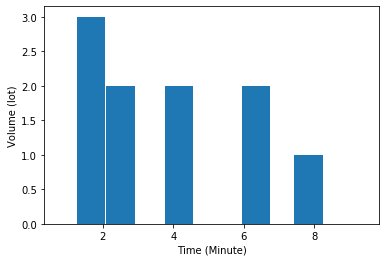

IndexError: list index out of range

In [43]:
CFRSKMedoids(8,cartposition,pickup,delivery,Volume)

In [93]:
statistics.variance([2.8333333,2.875,2.0])

0.24363425046296336

In [44]:
import re as re
df11 = pd.read_csv('Request_Lf_db17.csv')
df11 = df11.reset_index()
df11.columns=['Pickup', 'Constant1','Delivery','Constant2','Volume']
df11 = df11[['Pickup','Delivery','Volume']]

df11['Pickup'] = df11['Pickup'].apply(lambda x: " ".join(re.findall(r'[0-9]+',x)))
df11['Delivery'] = df11['Delivery'].apply(lambda x: " ".join(re.findall(r'[0-9]+',x)))

Volume = df11['Volume'].to_list()
pickup = df11['Pickup'].to_list()
delivery = df11['Delivery'].to_list()
pickup = [int(i) for i in pickup]
delivery = [int(j) for j in delivery]

print(pickup,delivery,Volume)

[7, 7, 1, 5, 2, 13, 14, 14, 8, 9, 10, 2, 10, 13, 14, 13, 14, 13, 13, 13, 14, 13, 13] [11, 10, 7, 8, 8, 8, 8, 6, 5, 14, 13, 13, 14, 4, 11, 1, 7, 7, 9, 10, 10, 5, 6] [1, 1, 1, 10, 1, 5, 1, 1, 1, 1, 5, 1, 2, 2, 12, 1, 1, 1, 1, 1, 1, 1, 1]


Distances = [10, 110, 10, 60, 10, 50, 0, 80, 40, 40, 0, 30, 30, 70, 70, 40, 70] 
 Route = [3, 2, 13, 14, 8, 9, 14, 14, 6, 10, 14, 14, 11, 14, 7, 14, 10, 3] 
 Distance = 720 
 time = 720 secs 
  Request = [7, 8, 10, 12, 13, 15, 17, 21] 
 Depot =  3 
 Volume = [1, 1, 1, 1, 2, 12, 1, 1] 20 
 AvgCartLoad = 2.5 



C:\Users\peace\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.


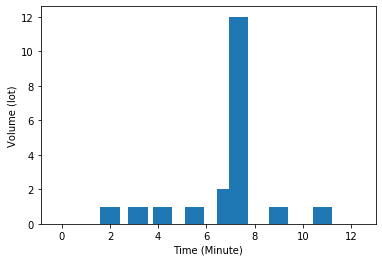



Distances = [10, 60, 70, 60, 40] 
 Route = [3, 2, 8, 1, 7, 3] 
 Distance = 240 
 time = 240 secs 
  Request = [3, 5] 
 Depot =  3 
 Volume = [1, 1] 2 
 AvgCartLoad = 1.0 



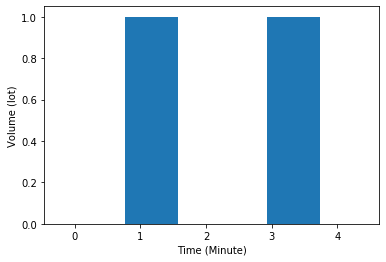



Distances = [70, 30, 0, 50, 50, 90, 90, 60, 60, 40, 40, 30, 30, 80, 80, 70, 30] 
 Route = [3, 10, 13, 13, 8, 13, 4, 13, 7, 13, 9, 13, 10, 13, 5, 13, 6, 3] 
 Distance = 900 
 time = 900 secs 
  Request = [6, 11, 14, 18, 19, 20, 22, 23] 
 Depot =  3 
 Volume = [5, 5, 2, 1, 1, 1, 1, 1] 17 
 AvgCartLoad = 2.125 



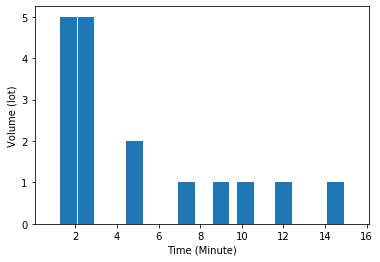



Distances = [40, 40, 80] 
 Route = [3, 7, 11, 3] 
 Distance = 160 
 time = 160 secs 
  Request = [1] 
 Depot =  3 
 Volume = [1] 1 
 AvgCartLoad = 1.0 



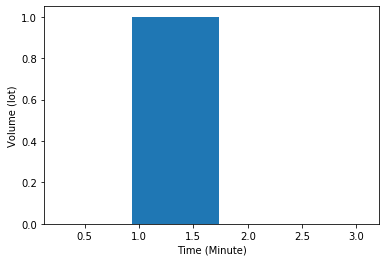



Distances = [20, 30, 0, 30, 20] 
 Route = [3, 5, 8, 8, 5, 3] 
 Distance = 100 
 time = 100 secs 
  Request = [4, 9] 
 Depot =  3 
 Volume = [10, 1] 11 
 AvgCartLoad = 5.5 



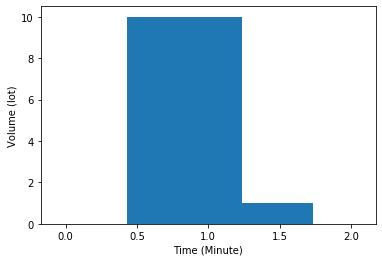



Variance = 3.403125


In [46]:
CFRSKMeans(8,cartposition,pickup,delivery,Volume)

In [135]:
statistics.variance([1,1,5.5,1,2.125,1,2.5])

2.752232142857143

C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  "its corres

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Distances = [10, 110, 0, 50, 0, 30, 0, 30, 10, 40, 10, 30, 0, 90, 20, 60, 10, 30, 0, 40, 0, 60, 10, 50, 0, 80, 50, 60, 60, 120, 120, 60, 60, 40, 40, 30, 30, 80, 80, 70, 80, 30, 30, 70, 70, 40, 70] 
 Route = [3, 2, 13, 13, 8, 8, 5, 5, 8, 7, 11, 10, 13, 13, 4, 2, 8, 7, 10, 10, 14, 14, 8, 9, 14, 14, 6, 1, 7, 13, 1, 13, 7, 13, 9, 13, 10, 13, 5, 13, 6, 14, 11, 14, 7, 14, 10, 3] 
 Distance = 2060 
 time = 2060 secs 
  Request = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23] 
 Depot =  3 
 Volume = [1, 1, 1, 10, 1, 5, 1, 1, 1, 1, 5, 1, 2, 2, 12, 1, 1, 1, 1, 1, 1, 1, 1] 53 
 AvgCartLoad = 2.3043478260869565 





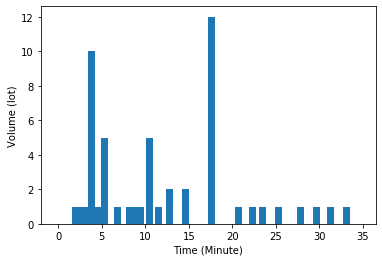

IndexError: list index out of range

In [47]:
CFRSKMedoids(8,cartposition,pickup,delivery,Volume)

In [98]:
statistics.variance([2.3043478])

StatisticsError: variance requires at least two data points

In [48]:
import re as re
df12 = pd.read_csv('Request_Lf_db18.csv')
df12 = df12.reset_index()
df12.columns=['Pickup', 'Constant1','Delivery','Constant2','Volume']
df12 = df12[['Pickup','Delivery','Volume']]

df12['Pickup'] = df12['Pickup'].apply(lambda x: " ".join(re.findall(r'[0-9]+',x)))
df12['Delivery'] = df12['Delivery'].apply(lambda x: " ".join(re.findall(r'[0-9]+',x)))

Volume = df12['Volume'].to_list()
pickup = df12['Pickup'].to_list()
delivery = df12['Delivery'].to_list()
pickup = [int(i) for i in pickup]
delivery = [int(j) for j in delivery]

print(pickup,delivery,Volume)

[7, 7, 1, 5, 2, 13, 14, 14, 8, 9, 10, 10, 2, 10, 13, 11, 14, 14, 14, 13, 14, 11, 13, 13, 13] [11, 10, 7, 8, 8, 8, 8, 6, 5, 14, 14, 13, 14, 4, 4, 4, 11, 1, 7, 7, 9, 7, 10, 5, 6] [2, 1, 1, 11, 1, 5, 1, 1, 1, 1, 5, 2, 1, 1, 1, 2, 10, 1, 2, 1, 1, 1, 2, 1, 1]


Distances = [10, 120, 110] 
 Route = [3, 2, 14, 3] 
 Distance = 240 
 time = 240 secs 
  Request = [13] 
 Depot =  3 
 Volume = [1] 1 
 AvgCartLoad = 1.0 



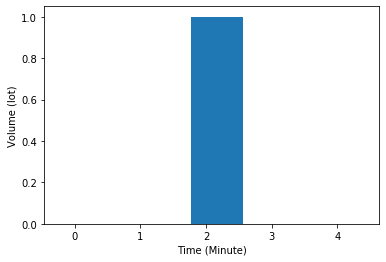



Distances = [40, 40, 0, 70, 70, 40, 40] 
 Route = [3, 7, 11, 11, 4, 11, 7, 3] 
 Distance = 300 
 time = 300 secs 
  Request = [1, 16, 22] 
 Depot =  3 
 Volume = [2, 2, 1] 5 
 AvgCartLoad = 1.6666666666666667 



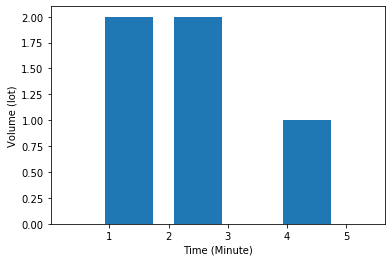



Distances = [70, 30, 0, 50, 50, 90, 90, 60, 60, 30, 30, 80, 80, 70, 30] 
 Route = [3, 10, 13, 13, 8, 13, 4, 13, 7, 13, 10, 13, 5, 13, 6, 3] 
 Distance = 820 
 time = 820 secs 
  Request = [6, 12, 15, 20, 23, 24, 25] 
 Depot =  3 
 Volume = [5, 2, 1, 1, 2, 1, 1] 13 
 AvgCartLoad = 1.8571428571428572 



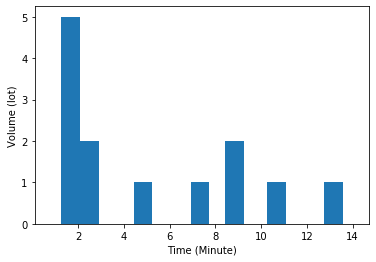



Distances = [10, 60, 70, 60, 40] 
 Route = [3, 2, 8, 1, 7, 3] 
 Distance = 240 
 time = 240 secs 
  Request = [3, 5] 
 Depot =  3 
 Volume = [1, 1] 2 
 AvgCartLoad = 1.0 



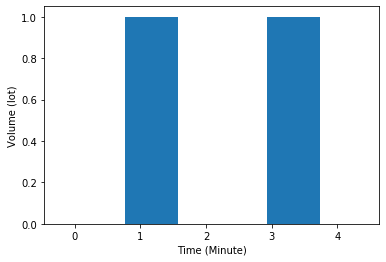



Distances = [60, 50, 0, 60, 20, 40, 0, 80, 80, 30, 30, 70, 70, 50, 60] 
 Route = [3, 9, 14, 14, 8, 10, 14, 14, 6, 14, 11, 14, 7, 14, 9, 3] 
 Distance = 700 
 time = 700 secs 
  Request = [7, 8, 10, 11, 17, 19, 21] 
 Depot =  3 
 Volume = [1, 1, 1, 5, 10, 2, 1] 21 
 AvgCartLoad = 3.0 



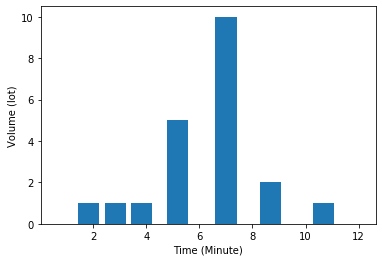



Variance = 0.6739229024943311


In [49]:
CFRSKMeans(8,cartposition,pickup,delivery,Volume)

C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  "its corres

[0 0 0 0 0 1 7 7 0 7 7 1 7 0 1 0 7 7 7 1 7 0 1 1 1]
Distances = [10, 60, 0, 30, 0, 30, 10, 40, 0, 70, 30, 30, 0, 60, 30, 60, 40, 40, 40] 
 Route = [3, 2, 8, 8, 5, 5, 8, 7, 11, 11, 4, 7, 10, 10, 4, 1, 7, 11, 7, 3] 
 Distance = 580 
 time = 580 secs 
  Request = [1, 2, 3, 4, 5, 9, 14, 16, 22] 
 Depot =  3 
 Volume = [2, 1, 1, 11, 1, 1, 1, 2, 1] 21 
 AvgCartLoad = 2.3333333333333335 





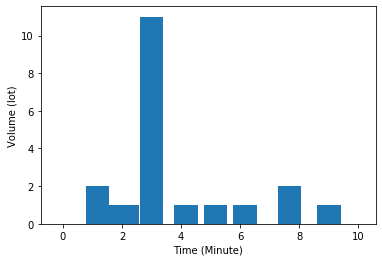



Distances = [70, 30, 0, 50, 50, 90, 90, 60, 60, 30, 30, 80, 80, 70, 30] 
 Route = [3, 10, 13, 13, 8, 13, 4, 13, 7, 13, 10, 13, 5, 13, 6, 3] 
 Distance = 820 
 time = 820 secs 
  Request = [6, 12, 15, 20, 23, 24, 25] 
 Depot =  3 
 Volume = [5, 2, 1, 1, 2, 1, 1] 13 
 AvgCartLoad = 1.8571428571428572 





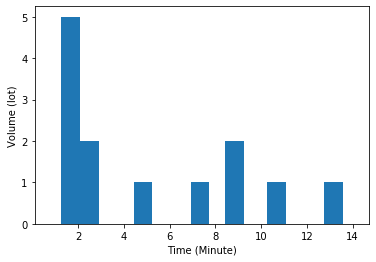



Distances = [10, 120, 0, 60, 10, 50, 0, 80, 40, 40, 0, 30, 30, 130, 130, 70, 70, 50, 60] 
 Route = [3, 2, 14, 14, 8, 9, 14, 14, 6, 10, 14, 14, 11, 14, 1, 14, 7, 14, 9, 3] 
 Distance = 980 
 time = 980 secs 
  Request = [7, 8, 10, 11, 13, 17, 18, 19, 21] 
 Depot =  3 
 Volume = [1, 1, 1, 5, 1, 10, 1, 2, 1] 23 
 AvgCartLoad = 2.5555555555555554 





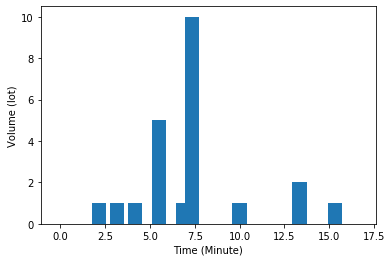

IndexError: list index out of range

In [50]:
CFRSKMedoids(8,cartposition,pickup,delivery,Volume)

In [265]:
statistics.variance([2.3333333,1.8571429,2.5555556])

0.12732005786512335

In [51]:
import re as re
df13 = pd.read_csv('Request_Lf_db19.csv')
df13 = df13.reset_index()
df13.columns=['Pickup', 'Constant1','Delivery','Constant2','Volume']
df13 = df13[['Pickup','Delivery','Volume']]

df13['Pickup'] = df13['Pickup'].apply(lambda x: " ".join(re.findall(r'[0-9]+',x)))
df13['Delivery'] = df13['Delivery'].apply(lambda x: " ".join(re.findall(r'[0-9]+',x)))

Volume = df13['Volume'].to_list()
pickup = df13['Pickup'].to_list()
delivery = df13['Delivery'].to_list()
pickup = [int(i) for i in pickup]
delivery = [int(j) for j in delivery]

print(pickup,delivery,Volume)

[7, 7, 1, 5, 2, 13, 14, 14, 8, 9, 10, 10, 2, 10, 13, 11, 13, 14, 14, 14, 13, 14, 12] [11, 10, 7, 8, 8, 8, 8, 6, 5, 14, 14, 13, 14, 4, 4, 4, 1, 11, 1, 7, 7, 9, 7] [3, 1, 1, 11, 1, 5, 1, 1, 1, 1, 6, 1, 1, 1, 1, 2, 1, 10, 1, 2, 1, 1, 1]


Distances = [10, 120, 0, 130, 120, 120, 20] 
 Route = [3, 2, 14, 14, 1, 13, 1, 3] 
 Distance = 520 
 time = 520 secs 
  Request = [13, 17, 19] 
 Depot =  3 
 Volume = [1, 1, 1] 3 
 AvgCartLoad = 1.0 



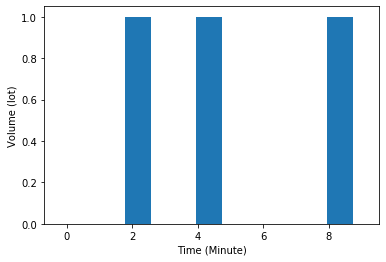



Distances = [40, 30, 0, 60, 10] 
 Route = [3, 7, 10, 10, 4, 3] 
 Distance = 140 
 time = 140 secs 
  Request = [2, 14] 
 Depot =  3 
 Volume = [1, 1] 2 
 AvgCartLoad = 1.0 



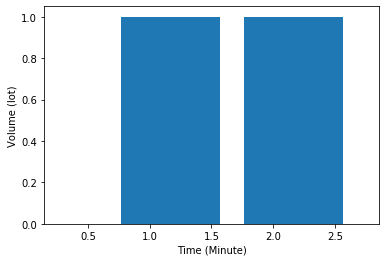



Distances = [70, 30, 0, 50, 50, 90, 90, 60, 40] 
 Route = [3, 10, 13, 13, 8, 13, 4, 13, 7, 3] 
 Distance = 480 
 time = 480 secs 
  Request = [6, 12, 15, 21] 
 Depot =  3 
 Volume = [5, 1, 1, 1] 8 
 AvgCartLoad = 2.0 



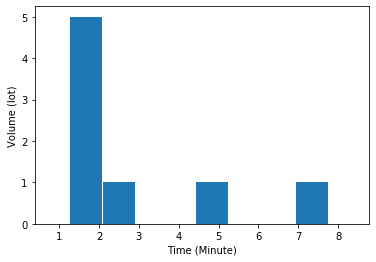



Distances = [20, 30, 0, 30, 20] 
 Route = [3, 5, 8, 8, 5, 3] 
 Distance = 100 
 time = 100 secs 
  Request = [4, 9] 
 Depot =  3 
 Volume = [11, 1] 12 
 AvgCartLoad = 6.0 



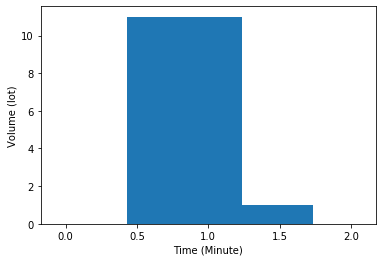



Distances = [60, 50, 0, 60, 20, 40, 0, 80, 80, 30, 30, 70, 70, 50, 60] 
 Route = [3, 9, 14, 14, 8, 10, 14, 14, 6, 14, 11, 14, 7, 14, 9, 3] 
 Distance = 700 
 time = 700 secs 
  Request = [7, 8, 10, 11, 18, 20, 22] 
 Depot =  3 
 Volume = [1, 1, 1, 6, 10, 2, 1] 22 
 AvgCartLoad = 3.142857142857143 



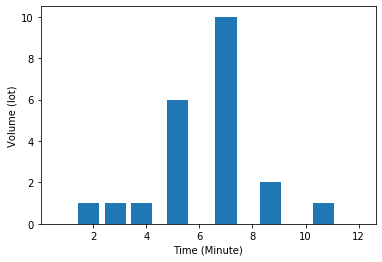



Variance = 4.332653061224489


In [52]:
CFRSKMeans(8,cartposition,pickup,delivery,Volume)

C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\peace\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be labeled with its corresponding cluster (5).
  "its corres

[0 0 0 0 0 1 4 4 0 4 4 1 4 0 1 0 4 4 4 4 1 4 1]
Distances = [10, 60, 0, 30, 0, 30, 10, 40, 0, 70, 30, 30, 0, 60, 30, 60, 40] 
 Route = [3, 2, 8, 8, 5, 5, 8, 7, 11, 11, 4, 7, 10, 10, 4, 1, 7, 3] 
 Distance = 500 
 time = 500 secs 
  Request = [1, 2, 3, 4, 5, 9, 14, 16] 
 Depot =  3 
 Volume = [3, 1, 1, 11, 1, 1, 1, 2] 21 
 AvgCartLoad = 2.625 





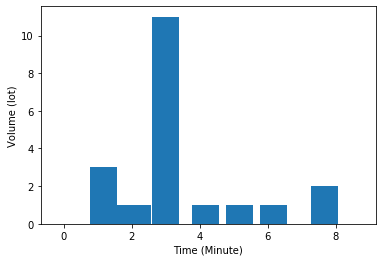



Distances = [70, 30, 0, 50, 40, 50, 60, 90, 90, 60, 40] 
 Route = [3, 10, 13, 13, 8, 12, 7, 13, 4, 13, 7, 3] 
 Distance = 580 
 time = 580 secs 
  Request = [6, 12, 15, 21, 23] 
 Depot =  3 
 Volume = [5, 1, 1, 1, 1] 9 
 AvgCartLoad = 1.8 





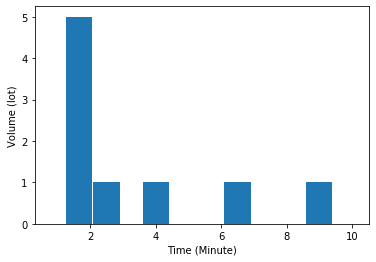



Distances = [10, 120, 0, 60, 10, 50, 0, 80, 40, 40, 0, 30, 20, 120, 130, 130, 130, 70, 70, 50, 60] 
 Route = [3, 2, 14, 14, 8, 9, 14, 14, 6, 10, 14, 14, 11, 13, 1, 14, 1, 14, 7, 14, 9, 3] 
 Distance = 1220 
 time = 1220 secs 
  Request = [7, 8, 10, 11, 13, 17, 18, 19, 20, 22] 
 Depot =  3 
 Volume = [1, 1, 1, 6, 1, 1, 10, 1, 2, 1] 25 
 AvgCartLoad = 2.5 





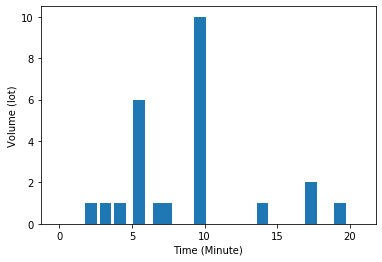

IndexError: list index out of range

In [53]:
CFRSKMedoids(8,cartposition,pickup,delivery,Volume)

In [46]:
statistics.variance([2.625,1.8,2.5])

0.19770833333333332